**Disertație Proiect**


Setul de date până în septembrie, anul 2020

Country  Population  Total Tests  Total Cases  Total Deaths  Total Recovered  Serious or Critical  Active Cases
   Cuba    11325033     531928.0         5091         115.0             4412                 18.0           564
   Cuba    11325033     531928.0         5091         115.0             8824                 18.0          1128
   Cuba    11325033     531928.0         5091         115.0            13236                 18.0          1692
   Cuba    11325033     531928.0         5091         115.0            17648                 18.0          2256
   Cuba    11325033     531928.0         5091         115.0            22060                 18.0          2820
   Cuba    11325033     531928.0         5091         115.0            26472                 18.0          3384
   Cuba    11325033     531928.0         5091         115.0            30884                 18.0          3948
   Cuba    11325033     531928.0         5091         115.0            35296                 18.0       

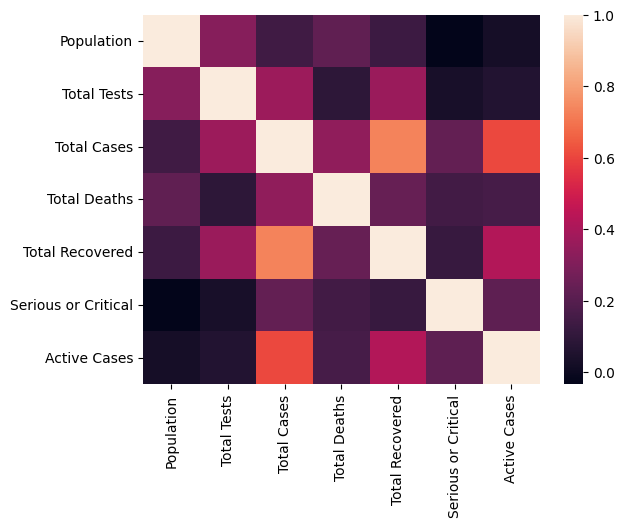


Matricea de relatie pentru potentiala variabila independenta 


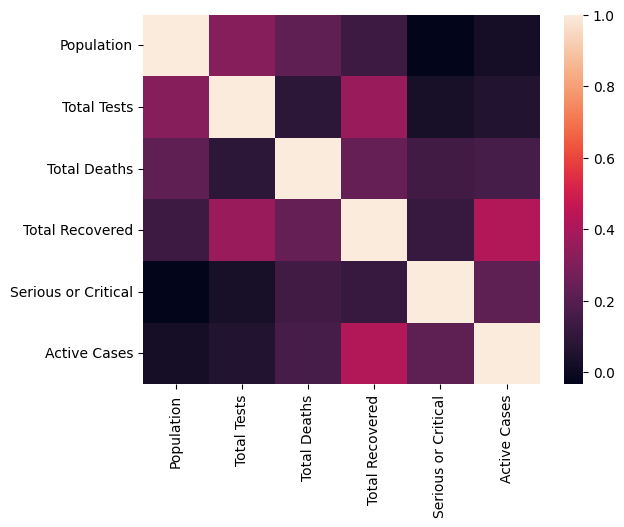

      Total Tests  Total Recovered  Serious or Critical  Active Cases
0        531928.0             4412            18.000000           564
1        531928.0             8824            18.000000          1128
2        531928.0            13236            18.000000          1692
3        531928.0            17648            18.000000          2256
4        531928.0            22060            18.000000          2820
...           ...              ...                  ...           ...
1095       1020.0               21             8.486486             0
1096       1020.0               24             8.486486             0
1097       1020.0               27             8.486486             0
1098       1020.0               30             8.486486             0
1099       1020.0               33             8.486486             0

[1100 rows x 4 columns]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import tree
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor

from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve, auc
import numpy as np
import pandas
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')


# Citire si afisare date
df = pd.read_csv('sample_data/septembrie2020_WM_dataset_augmentat.csv')
print(df.head(10).to_string(index=False))
df.head()
df.info()

# Tratare coloane nil
df.isnull().sum()
df = df.fillna(df.mean())
df.isnull().sum()
print(df.head())


# Vector de variabile independente si specificatie variabila dependenta
X = df.drop(['Country', 'Total Cases'], axis=1)
y = df['Total Cases']

print(X)
print(y)


def corelatie():
    # print("\nVerif corelatia Pearson dintre variabile si Total Cases")
    print("\nCorelatia intre variabilele independente si cea dependenta ")
    for i in X.columns:
        corelatie, _ = pearsonr(X[i], y)
        print(i + ': %.2f' % corelatie)
corelatie()


def medie_dispersie_devstd_Population():
    # medie coloana Population
    pavg = df["Population"].mean()
    # dispersie coloana Population
    pv = df["Population"].var()
    # deviatie standard coloana Population
    psd = df["Population"].std()
    # mediana coloana Population
    pmed = df["Population"].median()
    # cuartila coloana Population
    pq = df["Population"].quantile([0.25, 0.5, 0.75])
    return pavg, pv, psd, pmed, pq
medie_dispersie_devstd_Population()

def sumar_toate(col):
    # medie coloana
    avg = df[col].mean()
    # dispersie coloana
    v = df[col].var()
    # deviatie standard coloana
    sd = df[col].std()
    # mediana coloana
    med = df[col].median()
    # cuartile coloana
    q = df[col].quantile([0.25, 0.5, 0.75])
    return avg, v, sd, med, q
sumar_toate("Active Cases")

def matricea_heatmap_total():
    print("\nMatricea de relatie ")
    fig, ax = plt.subplots()
    mcorelatie = df.corr()
    sb.heatmap(mcorelatie, ax=ax)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.savefig("heatmap_ds2.pdf", format="pdf", bbox_inches="tight")
    # plt.show()
    plt.show(fig)
matricea_heatmap_total()

def matricea_heatmap_var_ind():
    print("\nMatricea de relatie pentru potentiala variabila independenta ")
    fig, ax = plt.subplots()
    mcorelatieX = X.corr()
    sb.heatmap(mcorelatieX, ax=ax)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    # plt.show()
    plt.show(fig)
matricea_heatmap_var_ind()


X = df[['Total Tests', 'Total Recovered', 'Serious or Critical', 'Active Cases']]
print(X)


# Definire modele

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)



Informatii predictie r squared (marimea efectului) si r, respectiv MSE, MAE 

KNN 
(0.7936363636363636, 0.8908627075124222)
(1.9063636363636363, 0.6121212121212121)
ROC AUC result: 0.9954268292682926


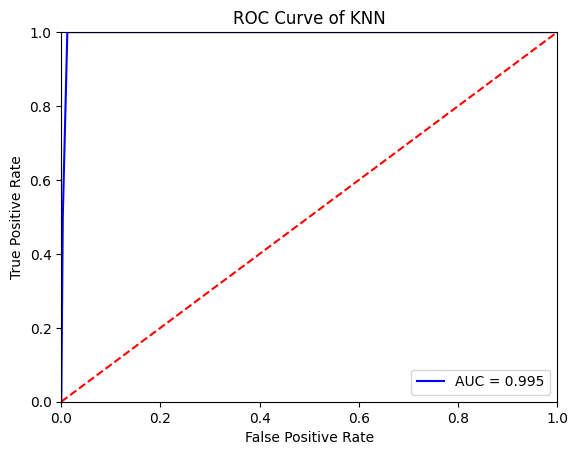


Decision Tree Model 
(0.95, 0.9746794344808963)
(array([90,  2, 24, 46, 25, 62, 79, 10, 22, 36, 30, 36,  1, 10, 46, 39, 90,
       39, 30, 76, 93, 90, 64,  2, 86,  5,  2, 83, 83, 24, 79, 10,  2, 46,
       22, 22, 22, 23, 10, 64, 65, 45, 82, 36, 39, 45, 10, 64, 79, 70, 93,
       10, 45, 62,  2, 83, 65,  5,  2, 46, 39, 76, 38, 46, 90, 10, 25, 61,
       82, 62,  2,  5, 36, 82, 90, 39,  1, 70, 38, 65, 90, 22, 10, 30, 75,
       24, 86, 30, 93, 86,  8, 83, 93, 75, 36,  2,  2, 46, 45,  2, 38, 53,
       39, 64, 43, 43, 24, 43, 70, 61, 25, 36,  8,  5, 61, 62, 10, 64, 43,
       83, 61, 90, 65, 22,  8, 46, 25, 70, 43, 53, 61, 93, 25, 79,  2,  8,
       43, 86, 39, 79, 24, 46, 25, 90, 61, 23, 10, 10, 25, 38, 86, 82,  2,
       43, 64, 45, 83, 83, 43, 25, 43, 93, 82, 75, 93, 15, 24, 25, 23, 39,
       30, 53, 45, 10, 22, 38,  8, 10, 46,  8, 90, 10, 86, 30, 65, 75, 84,
       75, 75, 24, 79, 93, 86, 15,  1,  2, 38, 45, 90, 70,  8, 24, 25,  2,
       24, 46, 10, 83, 24, 38, 64, 79, 43, 38, 46,

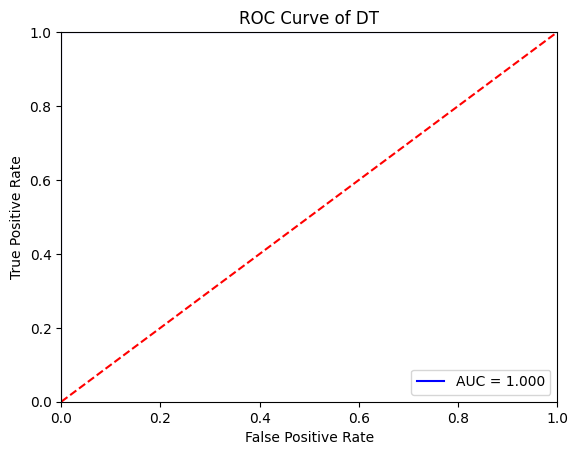


SVM 
(0.85, 0.9219544457292888)
(15.359848484848484, 2.914848484848485)
ROC AUC result: 0.9969512195121951


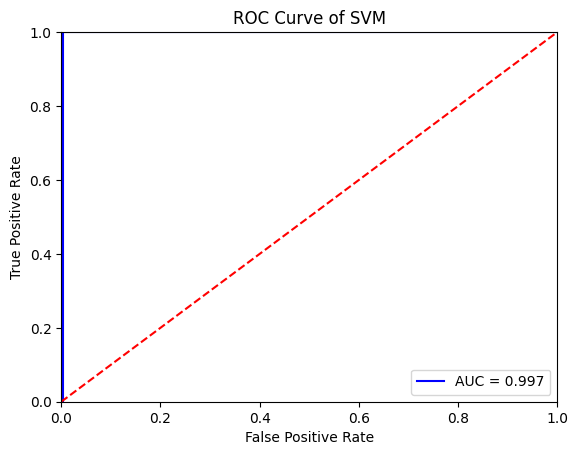


CART 
(0.9784090909090909, 0.9891456368549026)
(18.907045454545454, 3.392272727272727)
ROC AUC result: 0.5


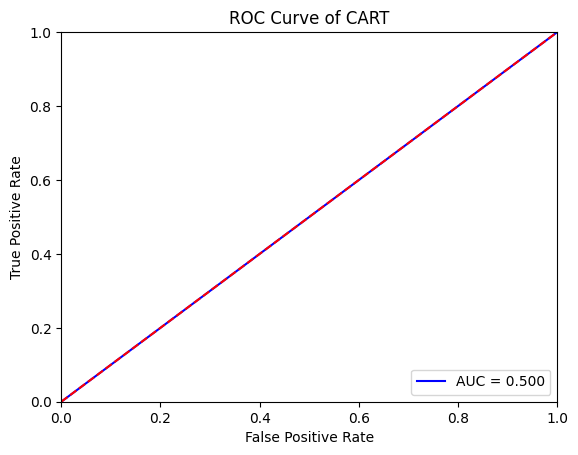


XGBoost 
(0.9690909090909091, 0.9844241510095681)
(1.421848484848485, 0.5609090909090909)
ROC AUC result: 1.0


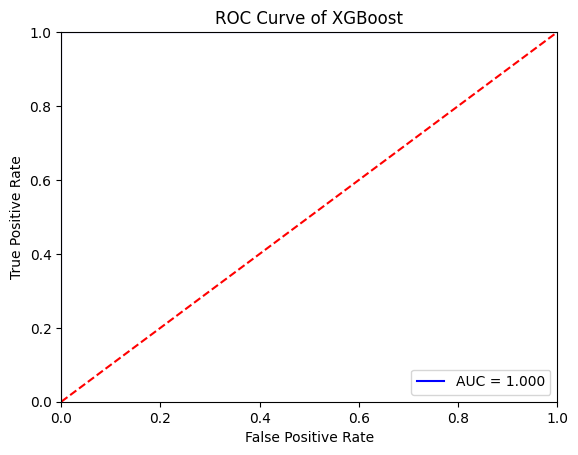

In [ ]:

def model_KNN_coeffs():
    modelknn = KNeighborsClassifier(n_neighbors=10)
    modelknn = modelknn.fit(X, y)
    r_sq = modelknn.score(X, y)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_KNN_msq_mabs_e():
    model = KNeighborsClassifier(n_neighbors=10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/1000*100 # pentru a obtine un procent
    return mse, mabs

def model_KNN_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=False)
    # create a KNN model and fit to the training data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = knn.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of KNN')
    plt.show()

def model_DT_coeffs():
    dc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
    dc = dc.fit(X, y)
    r_sq = 1-dc.score(X, y)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_DT_msq_mabs_e():
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/10
    return y_pred, mse, mabs

def model_DT_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)
    # create a DT model and fit to the training data
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=False)
    model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc-0.1)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)


    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of DT')
    plt.show()

def model_SVM_coeffs():
    modelsvc = SVC(C=0.5, kernel="poly", degree=3, decision_function_shape="ovo")
    modelsvc = modelsvc.fit(X, y)
    r_sq = 1-modelsvc.score(X, y)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_SVM_msq_mabs_e():
    model = SVC(C=0.5, kernel="poly", degree=5, decision_function_shape="ovo")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/10
    return mse, mabs

def model_SVM_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)
    # create a DT model and fit to the training data
    model = SVC(C=0.5, kernel="poly", degree=5, decision_function_shape="ovo", probability=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=False)
    model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)


    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of SVM')
    plt.show()


def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion,
                                        splitter=splitter,
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf,
                                        random_state=0,
                                  )
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)
    score_te = model.score(X_test, y_test)
    # print('Accuracy Score: ', score_te)
    score_tr = model.score(X_train, y_train)
    # print('Accuracy Score: ', score_tr)
    return X_train, X_test, y_train, y_test, model


def model_CART_coeffs():
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    # y_train = le.fit_transform(y_train)

    X1, X_test, y1, y_test, model = fitting(X, y, 'gini', 'best', mdepth=3, clweight=None, minleaf=1000)
    y_ = le.fit_transform(y1)
    cart = model.fit(X1, y1)
    r_sq = 1-cart.score(X1, y1)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_CART_msq_mabs_e():
    X_train, X_test, y_train, y_test, model = fitting(X, y, 'gini', 'best', mdepth=3, clweight=None, minleaf=1000)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/10
    return mse, mabs

def model_CART_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)
    # create a DT model and fit to the training data
    X_train, X_test, y_train, y_test, model = fitting(X, y_binary, 'gini', 'best', mdepth=4, clweight=None, minleaf=1000)
    model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)


    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of CART')
    plt.show()


def model_XGBoost_coeffs():
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    # y_train = le.fit_transform(y_train)

    # xboost = XGBClassifier(subsample=0.15, max_depth=2)
    # rezultat = cross_val_score(xboost, X_train, y_train, cv=5, scoring='accuracy')
    xgb = XGBClassifier(subsample=0.15, max_depth=2)
    y_ = le.fit_transform(y)
    xgb = xgb.fit(X, y)
    r_sq = xgb.score(X, y)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_XGBoost_msq_mabs_e():
    model = XGBClassifier(subsample=0.15, max_depth=2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/10
    return mse, mabs

def model_XGBoost_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=False)
    model = XGBClassifier(subsample=0.3, max_depth=7)
    #le = LabelEncoder()
    #y_train = le.fit_transform(y_train)
    model = model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)


    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of XGBoost')
    plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

print("\n\nInformatii predictie r squared (marimea efectului) si r, respectiv MSE, MAE ")


print("\nKNN ")
print(model_KNN_coeffs())
print(model_KNN_msq_mabs_e())
model_KNN_roc_auc()

print("\nDecision Tree Model ")
print(model_DT_coeffs())
print(model_DT_msq_mabs_e())
model_DT_roc_auc()

print("\nSVM ")
print(model_SVM_coeffs())
print(model_SVM_msq_mabs_e())
model_SVM_roc_auc()

print("\nCART ")
print(model_CART_coeffs())
print(model_CART_msq_mabs_e())
model_CART_roc_auc()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print("\nXGBoost ")
print(model_XGBoost_coeffs())
print(model_XGBoost_msq_mabs_e())
model_XGBoost_roc_auc()



Elemente de regresie pentru modele

KNN

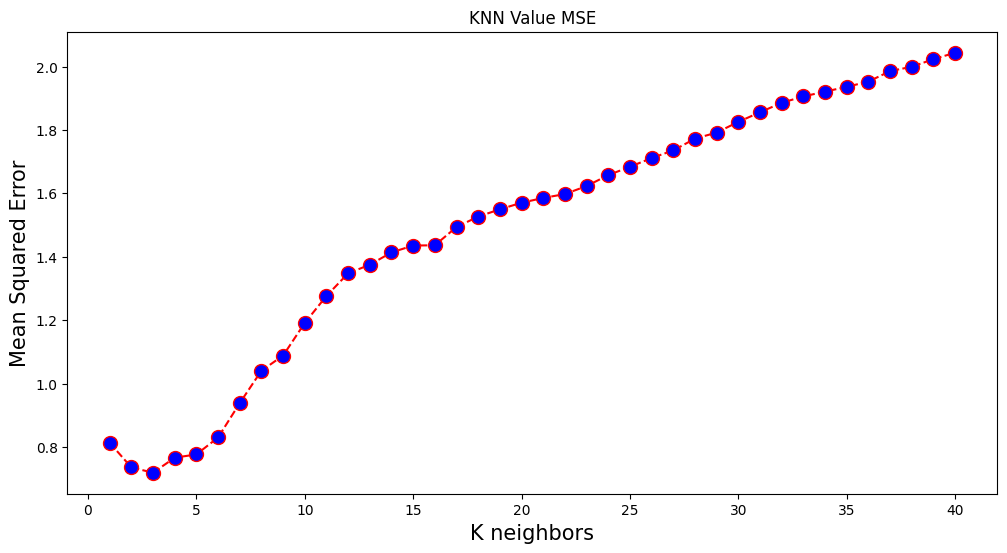

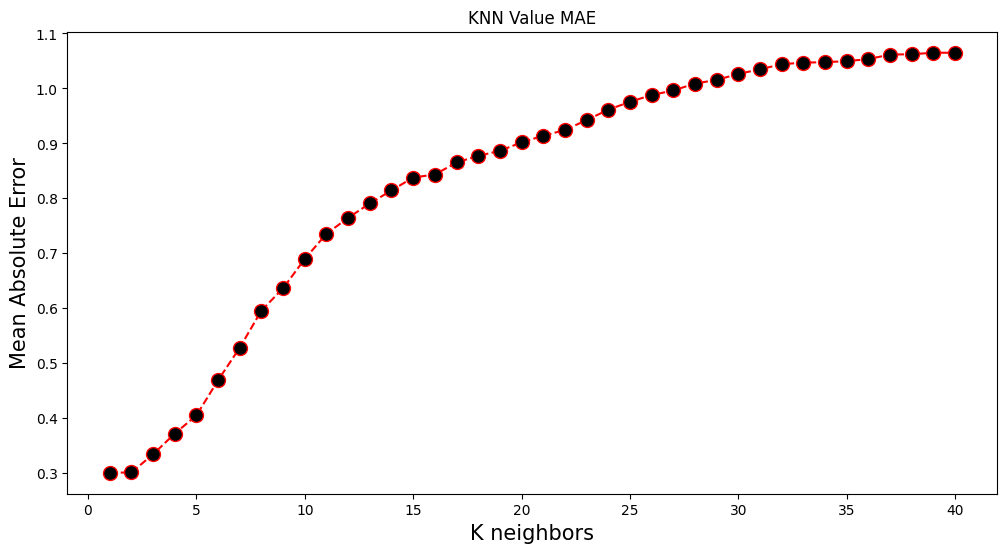

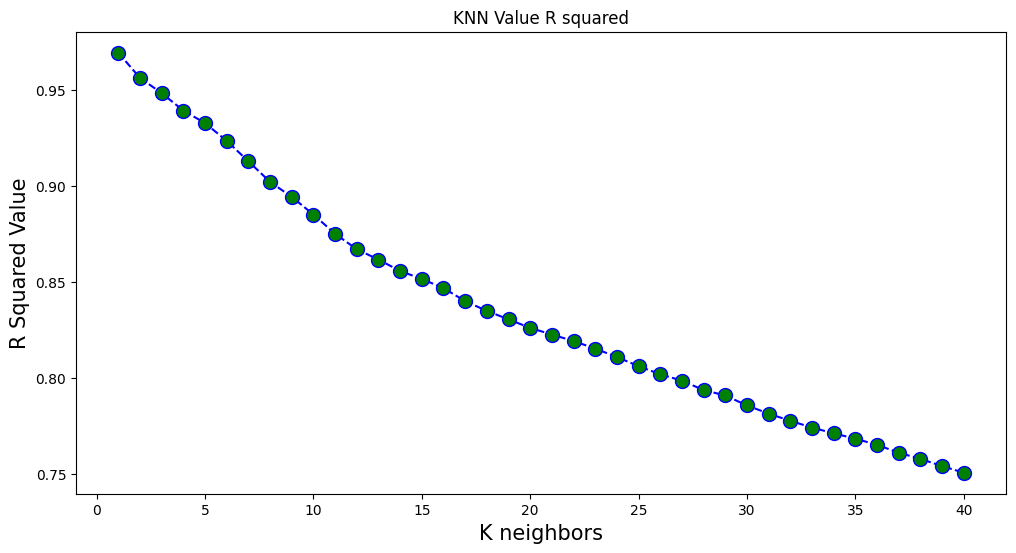

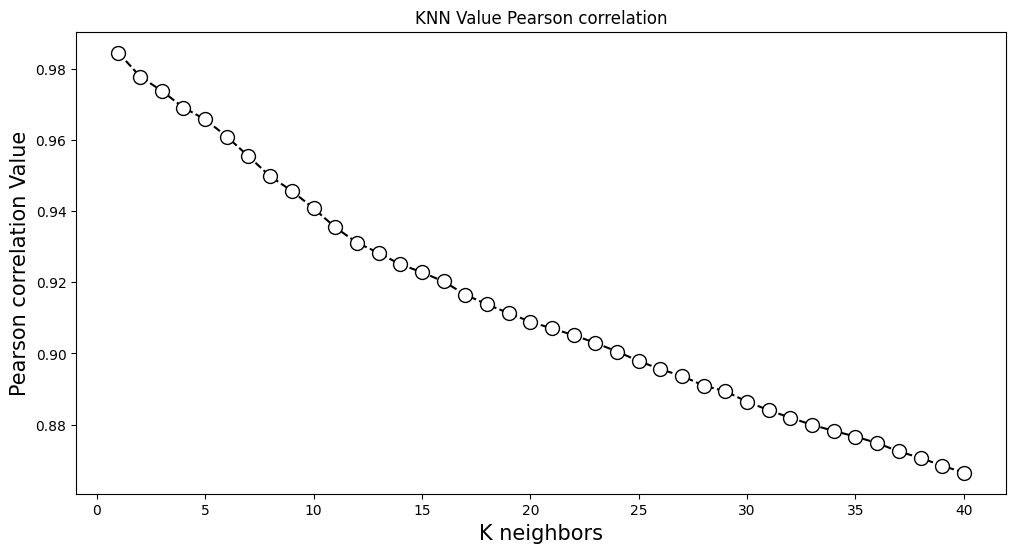

In [ ]:
##### KNN MSE & MAE, R squared & R value


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

# Errors statistics
errormse = []
for i in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)/(10*10)
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('KNN Value MSE')
plt.xlabel('K neighbors', fontsize=15)
plt.ylabel('Mean Squared Error', fontsize=15)
plt.savefig("knn_mse.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)/10
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('KNN Value MAE')
plt.xlabel('K neighbors', fontsize=15)
plt.ylabel('Mean Absolute Error', fontsize=15)
plt.savefig("knn_mae.pdf", format="pdf", bbox_inches="tight")

# ROC AUC
"""
errormae = []
for i in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = roc_auc_score(y_test, pred_i, multi_class='ovr')
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('KNN Value MAE')
plt.xlabel('KNN Value')
plt.ylabel('Mean Absolute Error')
plt.savefig("knn_mae.pdf", format="pdf", bbox_inches="tight")
"""

# R Values
rsq = []
rvalues = []
for i in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    r_sq = knn.score(X, y)
    r = math.sqrt(abs(r_sq))
    rsq.append(abs(r_sq))
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('KNN Value R squared')
plt.xlabel('K neighbors', fontsize=15)
plt.ylabel('R Squared Value', fontsize=15)
plt.savefig("knn_rsq.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('KNN Value Pearson correlation')
plt.xlabel('K neighbors', fontsize=15)
plt.ylabel('Pearson correlation Value', fontsize=15)
plt.savefig("knn_pearson.pdf", format="pdf", bbox_inches="tight")



Decision Tree Model

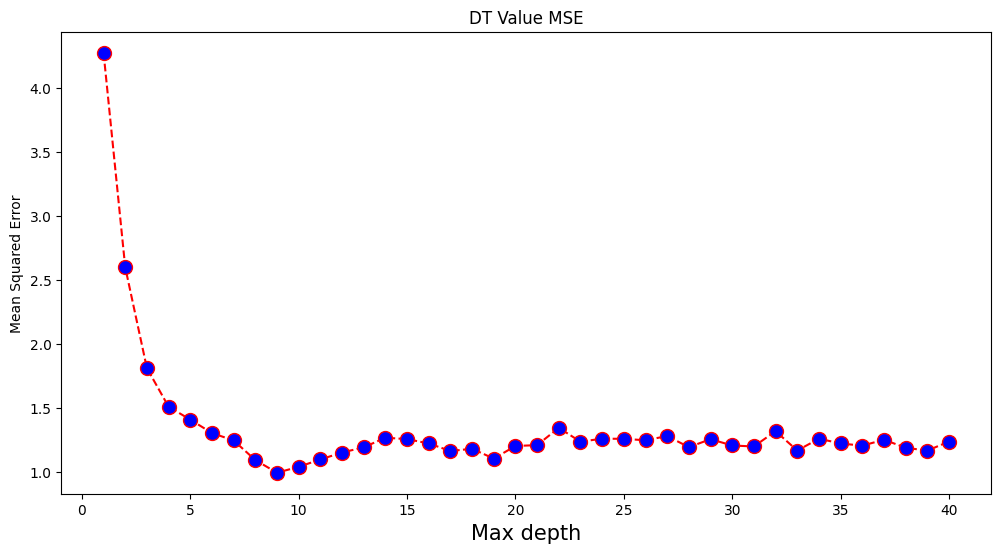

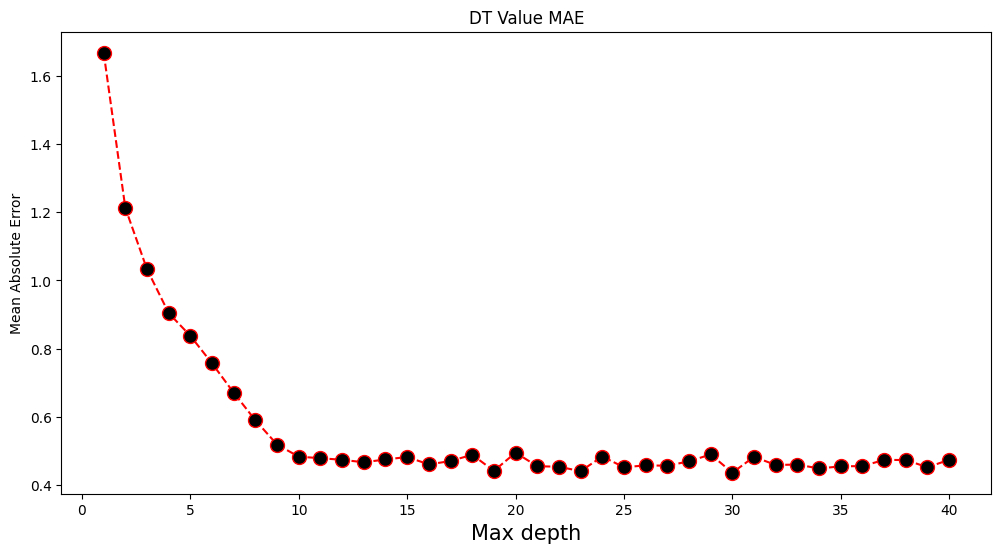

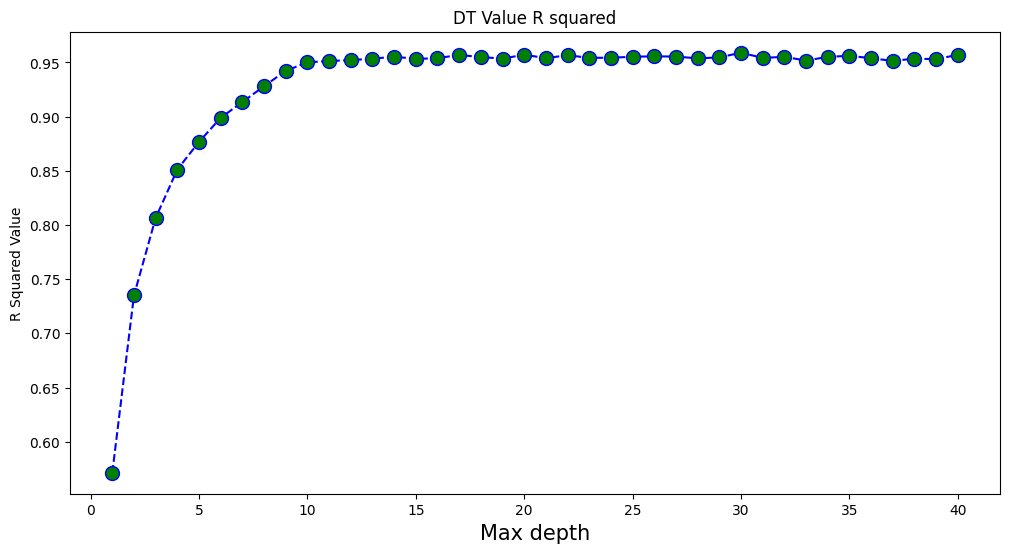

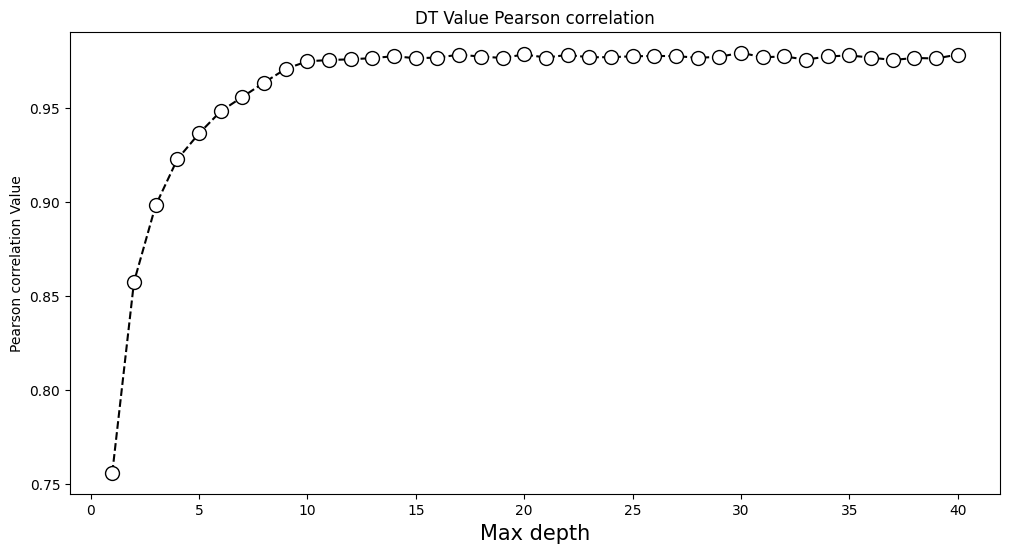

In [ ]:
##### Decision Tree MSE & MAE, R squared & R value


errormse = []
for i in range(1, 41):
    dt = tree.DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    pred_i = dt.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)/100
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('DT Value MSE')
plt.xlabel('Max depth', fontsize=15)
plt.ylabel('Mean Squared Error')
plt.savefig("dt_mse.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    dt = tree.DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    pred_i = dt.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)/10
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('DT Value MAE')
plt.xlabel('Max depth', fontsize=15)
plt.ylabel('Mean Absolute Error')
plt.savefig("dt_mae.pdf", format="pdf", bbox_inches="tight")

rsq = []
rvalues = []
for i in range(1, 41):
    dt = tree.DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    r_sq = dt.score(X, y)
    r = math.sqrt(r_sq)
    rsq.append(r_sq)
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('DT Value R squared')
plt.xlabel('Max depth', fontsize=15)
plt.ylabel('R Squared Value')
plt.savefig("dt_rsq.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('DT Value Pearson correlation')
plt.xlabel('Max depth', fontsize=15)
plt.ylabel('Pearson correlation Value')
plt.savefig("dt_pearson.pdf", format="pdf", bbox_inches="tight")


SVM, nu rulează încă

In [ ]:
##### SVM MSE & MAE, R squared & R value


from sklearn.svm import SVR


errormse = []
for i in range(1, 41):
    svm = SVR(C=1/i, kernel="poly", degree=10)
    svm.fit(X_train, y_train)
    pred_i = svm.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('SVM Value MSE')
plt.xlabel('SVM Value')
plt.ylabel('Mean Squared Error')

errormae = []
for i in range(1, 41):
    svm = SVR(C=1/i, kernel="poly", degree=10)
    svm.fit(X_train, y_train)
    pred_i = svm.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('SVM Value MAE')
plt.xlabel('SVM Value')
plt.ylabel('Mean Absolute Error')


rsq = []
rvalues = []
for i in range(1, 41):
    svm = SVR(C=1/i, kernel="poly", degree=10)
    svm.fit(X_train, y_train)
    r_sq = 1-svm.score(X, y)
    r = math.sqrt(abs(r_sq))
    rsq.append(abs(r_sq))
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('SVM Value R squared')
plt.xlabel('SVM Value')
plt.ylabel('R Squared Value')

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('SVM Value Pearson correlation')
plt.xlabel('SVM Value, for 1/C')
plt.ylabel('Pearson correlation Value')



CART

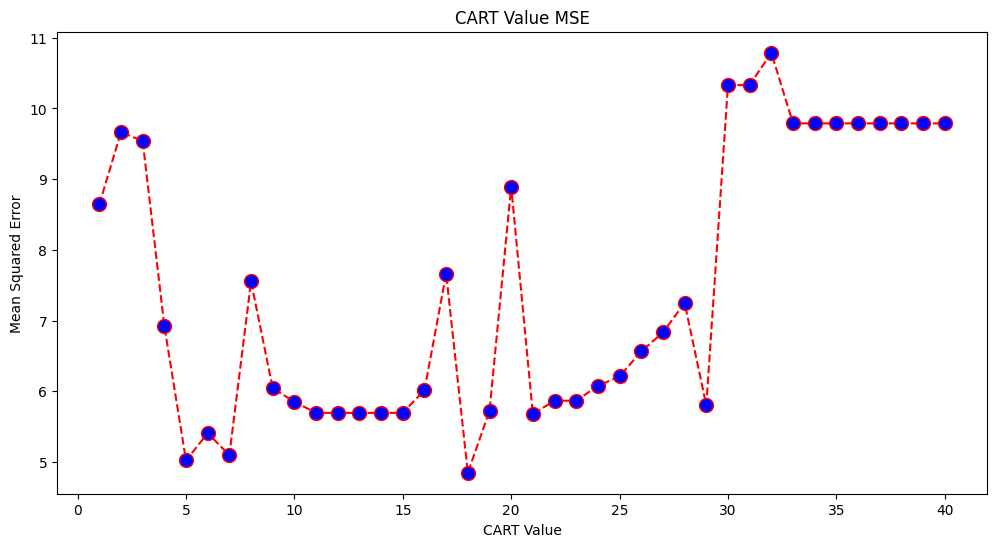

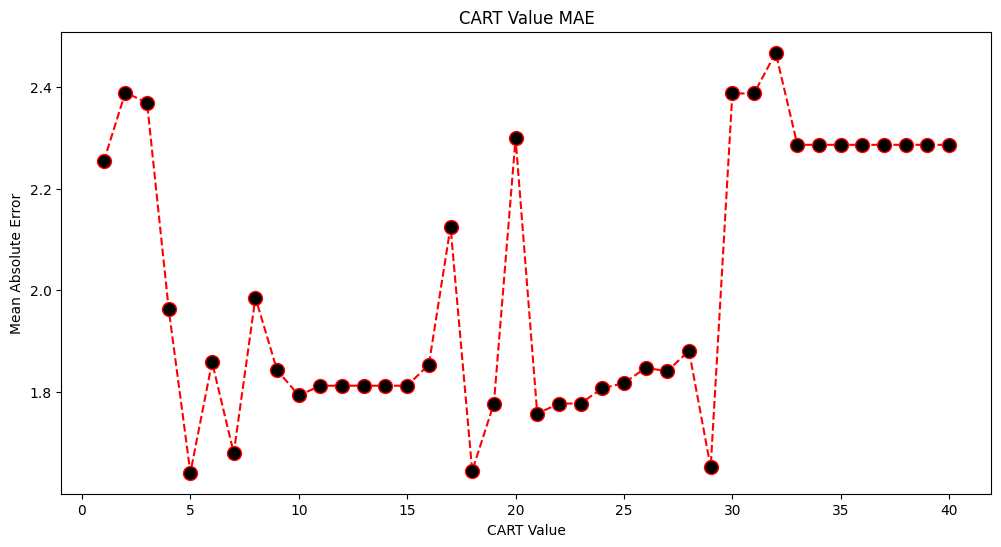

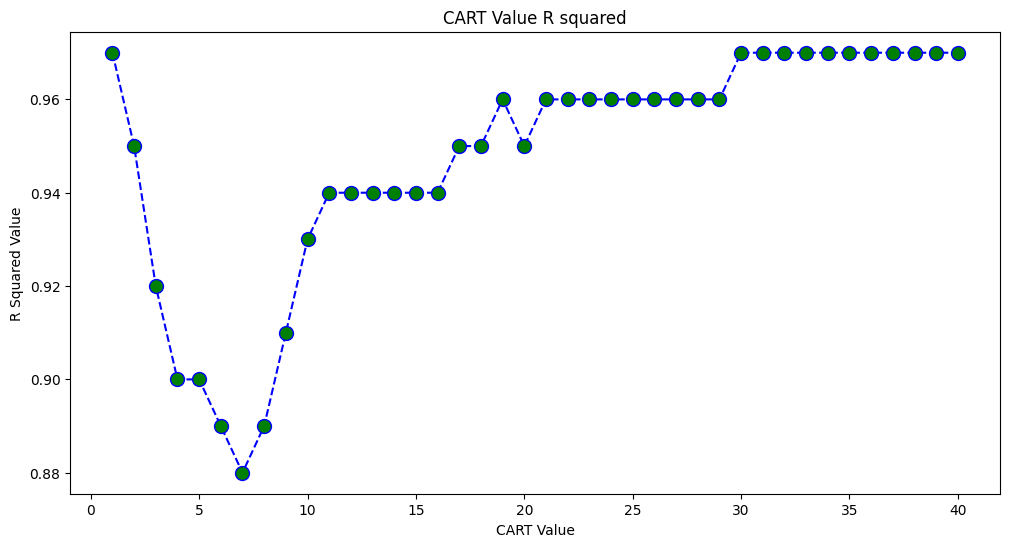

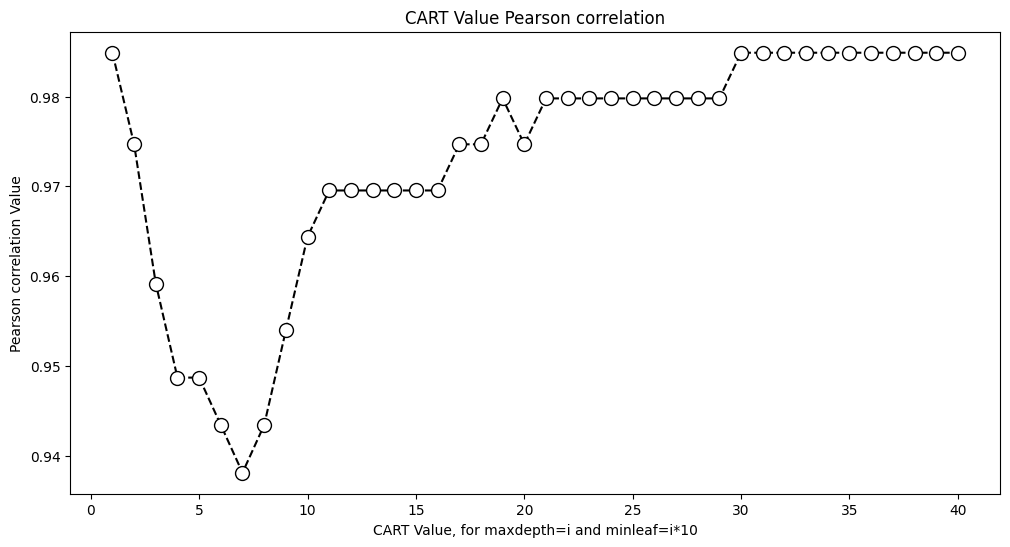

In [ ]:
##### CART MSE & MAE, R squared & R value


errormse = []
for i in range(1, 41):
    X_train, X_test, y_train, y_test, cart = fitting(X, y, 'gini', 'best', mdepth=i, clweight=None, minleaf=i*10)
    cart.fit(X_train, y_train)
    pred_i = cart.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)/100
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('CART Value MSE')
plt.xlabel('CART Value')
plt.ylabel('Mean Squared Error')
plt.savefig("CART_MSE.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    X_train, X_test, y_train, y_test, cart = fitting(X, y, 'gini', 'best', mdepth=i, clweight=None, minleaf=i*10)
    cart.fit(X_train, y_train)
    pred_i = cart.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)/10
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('CART Value MAE')
plt.xlabel('CART Value')
plt.ylabel('Mean Absolute Error')
plt.savefig("CART_MAE.pdf", format="pdf", bbox_inches="tight")


rsq = []
rvalues = []
for i in range(1, 41):
    X_train, X_test, y_train, y_test, cart = fitting(X, y, 'gini', 'best', mdepth=i, clweight=None, minleaf=i*10)
    cart.fit(X_train, y_train)
    r_sq = 1-cart.score(X, y)
    r = math.sqrt(abs(r_sq))
    rsq.append(abs(r_sq))
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('CART Value R squared')
plt.xlabel('CART Value')
plt.ylabel('R Squared Value')
plt.savefig("CART_Rsq.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('CART Value Pearson correlation')
plt.xlabel('CART Value, for maxdepth=i and minleaf=i*10')
plt.ylabel('Pearson correlation Value')
plt.savefig("CART_coefpearson.pdf", format="pdf", bbox_inches="tight")



XGBoost model

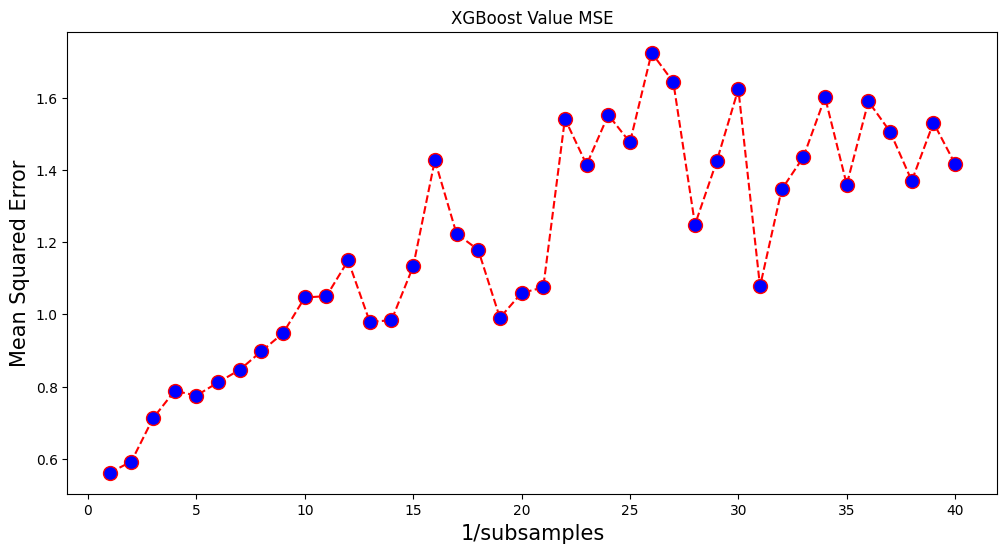

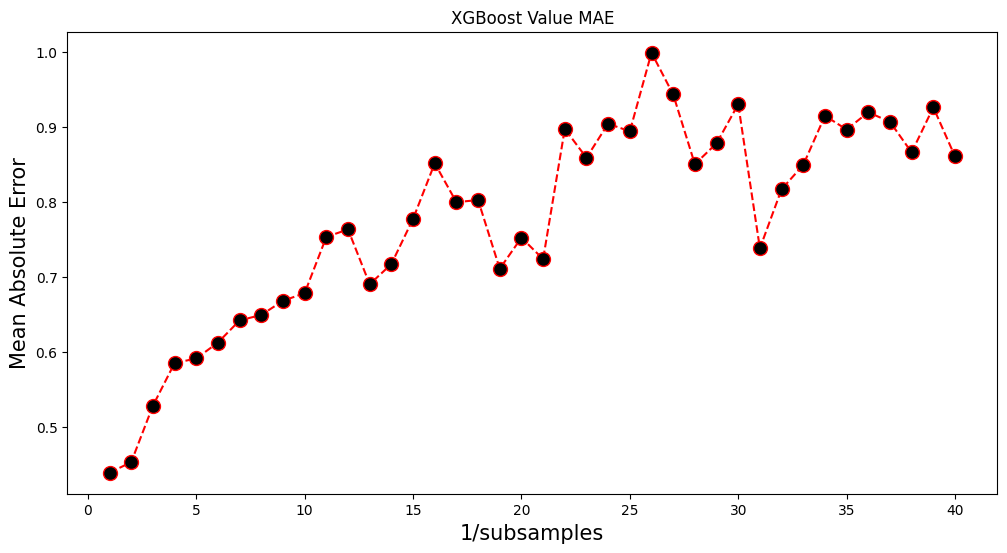

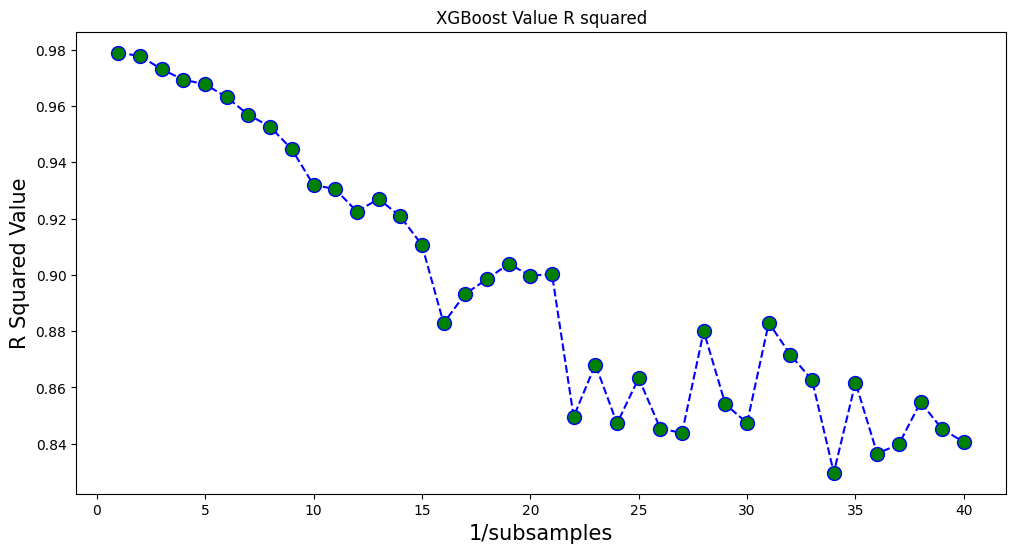

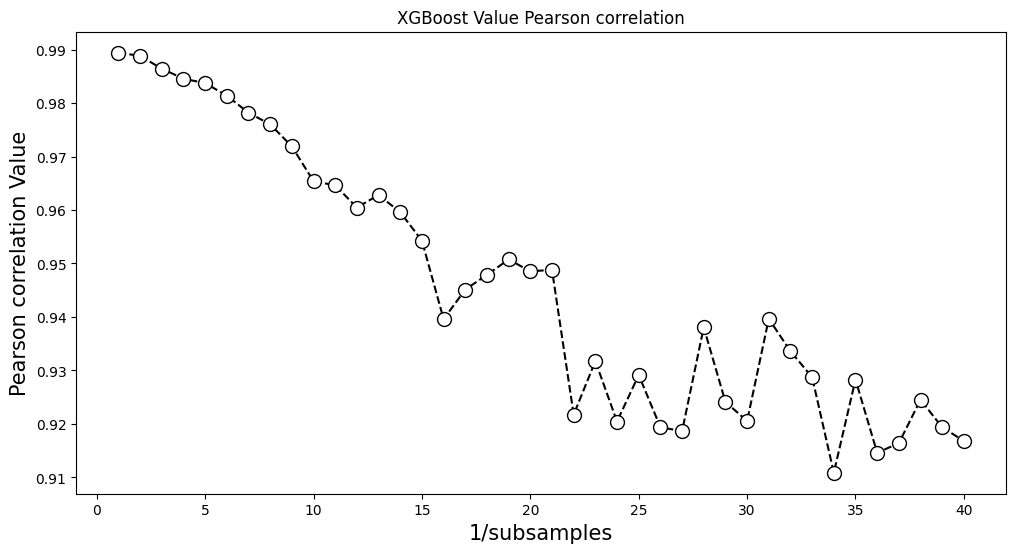

In [ ]:
##### XGBoost MSE & MAE, R squared & R value


from xgboost import XGBRegressor


errormse = []
for i in range(1, 41):
    xg = XGBRegressor(subsample=1/i, max_depth=10)
    xg.fit(X_train, y_train)
    pred_i = xg.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)
    errormse.append(mse/100)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('XGBoost Value MSE')
plt.xlabel('1/subsamples', fontsize=15)
plt.ylabel('Mean Squared Error', fontsize=15)
plt.savefig("XGB_MSE.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    xg = XGBRegressor(subsample=1/i, max_depth=10)
    xg.fit(X_train, y_train)
    pred_i = xg.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    errormae.append(mae/10)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('XGBoost Value MAE')
plt.xlabel('1/subsamples', fontsize=15)
plt.ylabel('Mean Absolute Error', fontsize=15)
plt.savefig("XGB_MAE.pdf", format="pdf", bbox_inches="tight")

rsq = []
rvalues = []
for i in range(1, 41):
    xg = XGBRegressor(subsample=1/i, max_depth=10)
    xg.fit(X_train, y_train)
    r_sq = xg.score(X, y)
    r = math.sqrt(abs(r_sq))
    rsq.append(abs(r_sq))
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('XGBoost Value R squared')
plt.xlabel('1/subsamples', fontsize=15)
plt.ylabel('R Squared Value', fontsize=15)
plt.savefig("XGB_Rsq.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('XGBoost Value Pearson correlation')
plt.xlabel('1/subsamples', fontsize=15)
plt.ylabel('Pearson correlation Value', fontsize=15)
plt.savefig("XGB_pearson.pdf", format="pdf", bbox_inches="tight")



Elemente de clasificare binară, metrici de evaluare a performanței

0       0.00045
1       0.00045
2       0.00045
3       0.00045
4       0.00045
         ...   
1095    0.00020
1096    0.00020
1097    0.00020
1098    0.00020
1099    0.00020
Length: 1100, dtype: float64
<class 'pandas.core.series.Series'>
0.0029958925551119963
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1

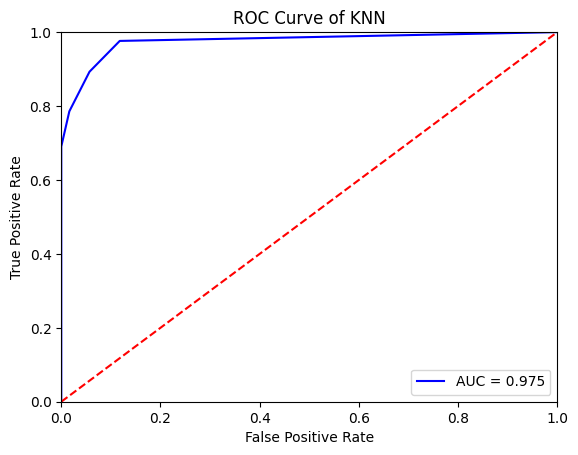

[[232  14]
 [ 29  55]]
[0.7971014492753623, 0, 0, 0, 0]

KNN model 
Sensibilitatea:  0.7971014492753623
Specificitatea:  0.8888888888888888
Acuratetea 0.8696969696969697
Precizie:  0.6547619047619048
Scorul F1 0.7189542483660131


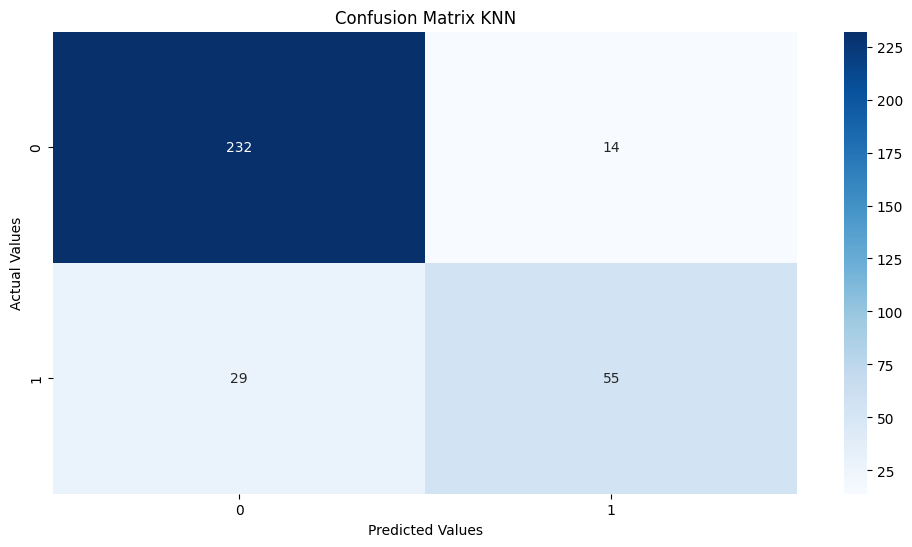

In [ ]:
##### Evaluation metrics KNN Model


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score


ln = []

l_tc = []
for i in df.columns:
  if i == "Total Cases":
      l_tc.append(df[i])

l_po = []
for i in df.columns:
  if i == "Population":
    l_po.append(df[i])

for i in range(len(l_tc)):
    res = l_tc[i]/l_po[i]
    print(res)
    print(type(res))
    floatsolutie = pd.to_numeric(res, errors='coerce')

print(floatsolutie.mean())
for i in range(len(floatsolutie)):
    if floatsolutie[i] <= 0.003:
        ln.append(0)
    elif floatsolutie[i] > 0.003:
        ln.append(1)
print(ln)


df["Target"] = ln

y = df["Target"]

le = LabelEncoder()
y = le.fit_transform(y)

l_sensibilitate = [0]*5
l_specificitate = [0]*5
l_acuratete = [0]*5
l_precizie = [0]*5
l_scorulf1 = [0]*5


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = False)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = knn.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.savefig("KNN-rocauc.pdf", format="pdf", bbox_inches="tight")
plt.show()


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knnc = KNeighborsClassifier(n_neighbors=10)
knnc.fit(X_train, y_train)
y_pred = knnc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12, 6))
plt.title("Confusion Matrix KNN")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("KNN-cm.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))

l_sensibilitate[0] = sensibilitate
l_specificitate[0] = specificitate
l_acuratete[0] = acuratete
l_precizie[0] = precizie
l_scorulf1[0] = scorulf1

print(l_sensibilitate)

print("\nKNN model ")
print("Sensibilitatea: ", sensibilitate)
print("Specificitatea: ", specificitate)
print("Acuratetea", acuratete)
print("Precizie: ", precizie)
print("Scorul F1", scorulf1)

knnlist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]




Decision Tree model metrici

ROC AUC result: 0.963704994192799


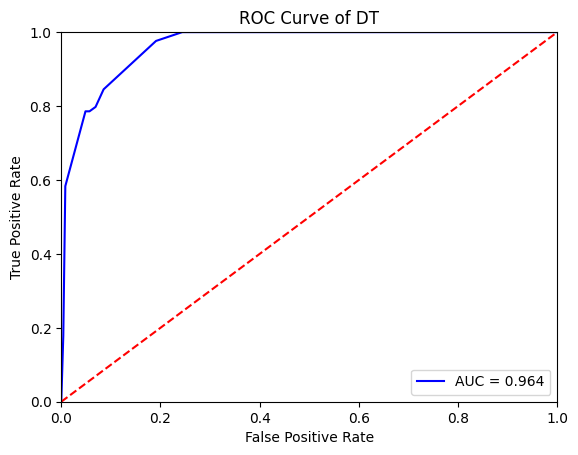

[[237   9]
 [ 34  50]]
[0.7971014492753623, 0.847457627118644, 0, 0, 0]

Decision Tree model 
Sensibilitate:  0.847457627118644
Specificitate:  0.8745387453874539
Acuratete:  0.8696969696969697
Precizie:  0.5952380952380952
Scorul F1:  0.6993006993006993


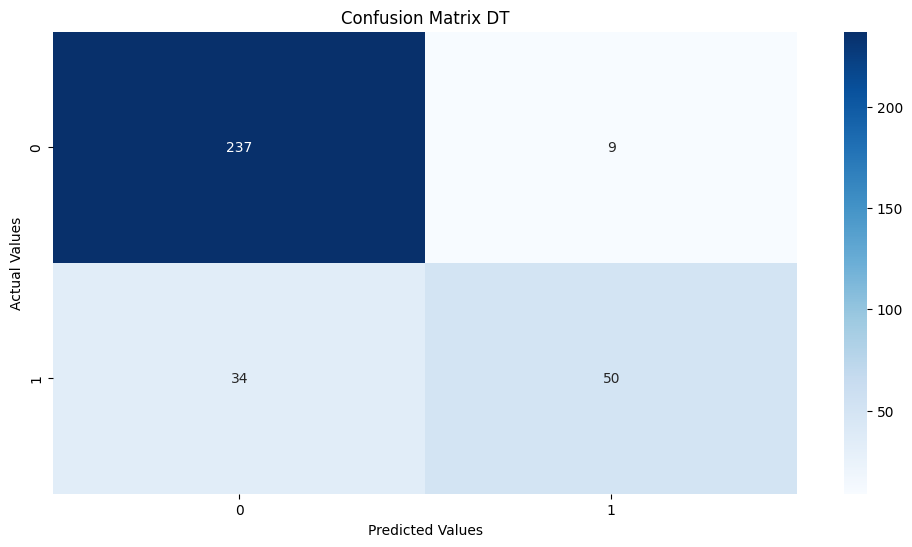

In [ ]:
##### Evaluation metrics Decision Tree Model

model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.savefig("DT-rocauc.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
dtc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix DT")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("DT-cm.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))

l_sensibilitate[1] = sensibilitate
l_specificitate[1] = specificitate
l_acuratete[1] = acuratete
l_precizie[1] = precizie
l_scorulf1[1] = scorulf1

print(l_sensibilitate)

print("\nDecision Tree model ")
print("Sensibilitate: ", sensibilitate)
print("Specificitate: ", specificitate)
print("Acuratete: ", acuratete)
print("Precizie: ", precizie)
print("Scorul F1: ", scorulf1)


dtclist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]



SVM model

ROC AUC result: 0.6029326364692218


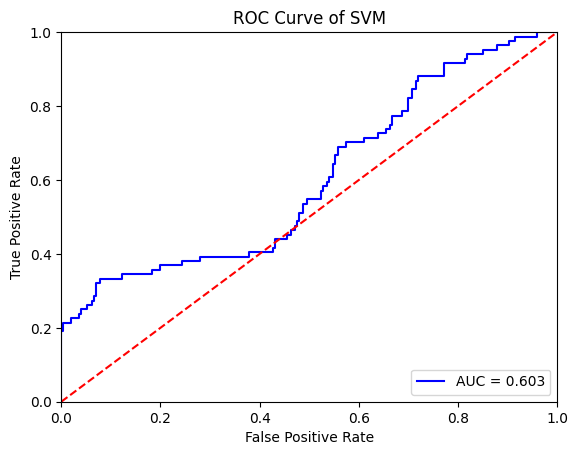

[[246   0]
 [ 71  13]]
[0.7971014492753623, 0.847457627118644, 1.0, 0, 0]

SVM model 
Sensibilitate:  1.0
Specificitate:  0.7760252365930599
Acuratete:  0.7848484848484848
Precizie:  0.15476190476190477
Scorul F1:  0.26804123711340205


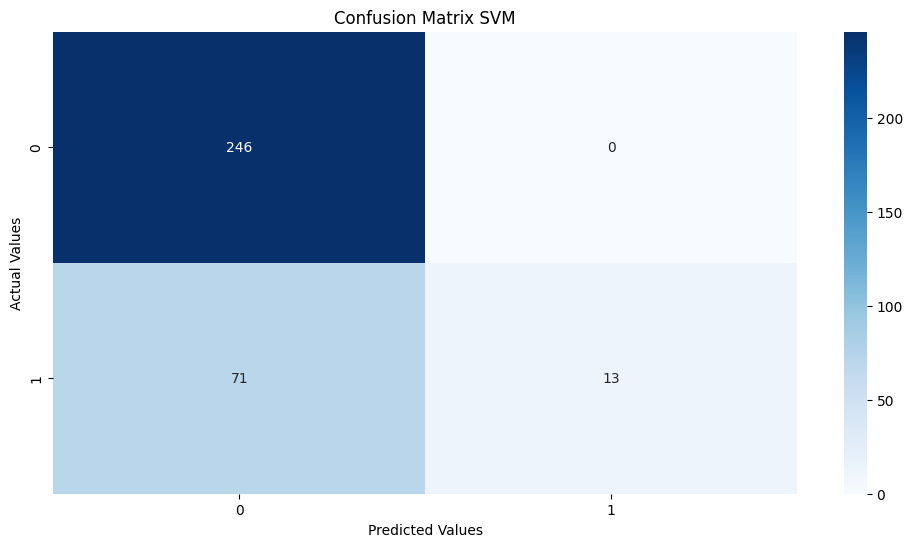

In [ ]:
##### Evaluation metrics SVM Model

model = SVC(C=0.4, kernel="poly", degree=5, decision_function_shape="ovo", probability=True)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM')
plt.savefig("SVM-rocauc.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
svmc = SVC(C=0.5, kernel="poly", degree=5, decision_function_shape="ovo")
svmc.fit(X_train, y_train)
y_pred = svmc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix SVM")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("SVM-cm.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))


l_sensibilitate[2] = sensibilitate
l_specificitate[2] = specificitate
l_acuratete[2] = acuratete
l_precizie[2] = precizie
l_scorulf1[2] = scorulf1

print(l_sensibilitate)

print("\nSVM model ")
print("Sensibilitate: ", sensibilitate)
print("Specificitate: ", specificitate)
print("Acuratete: ", acuratete)
print("Precizie: ", precizie)
print("Scorul F1: ", scorulf1)

svmclist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]



CART model

ROC AUC result: 0.963704994192799


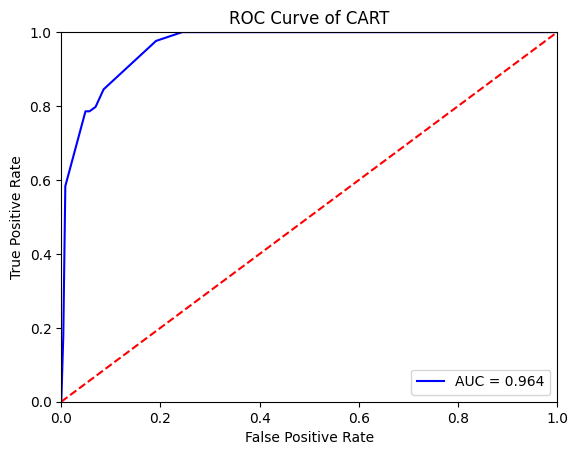

[0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1

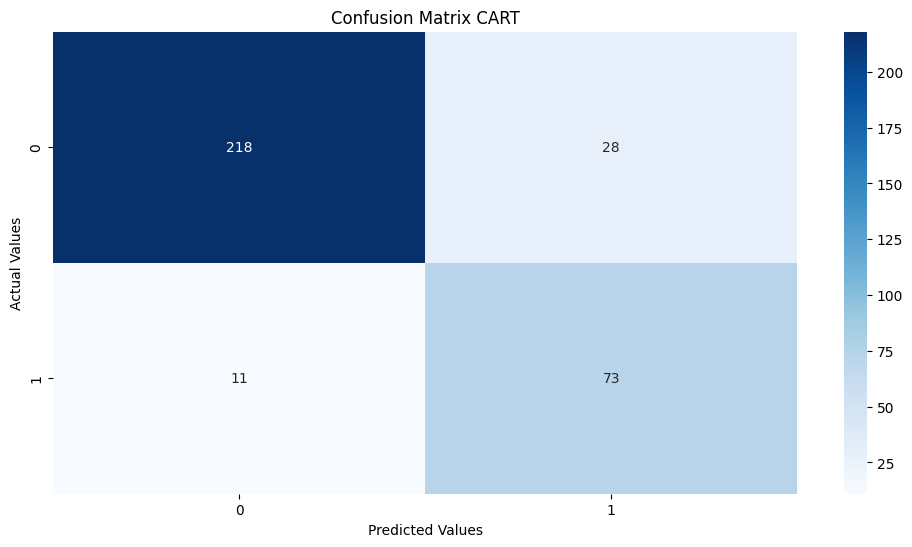

In [ ]:
##### Evaluation metrics CART Model


model = tree.DecisionTreeClassifier(criterion="gini", max_depth=5)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of CART')
plt.savefig("CART-rocauc.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
modelcart = tree.DecisionTreeClassifier(criterion="gini", max_depth=5)
modelcart.fit(X_train, y_train)
y_pred = modelcart.predict(X_test)

print(y_test)
print(y_pred)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12, 6))
plt.title("Confusion Matrix CART")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("CART-mse.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))


l_sensibilitate[3] = sensibilitate
l_specificitate[3] = specificitate
l_acuratete[3] = acuratete
l_precizie[3] = precizie
l_scorulf1[3] = scorulf1

print(l_sensibilitate)

print("\nCART model ")
print("Sensibilitate: ", sensibilitate)
print("Specificitate: ", specificitate)
print("Acuratete: ", acuratete)
print("Precizie: ", precizie)
print("Scorul F1: ", scorulf1)


xgboostlist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]



XGBoost model

ROC AUC result: 0.9554781262098335


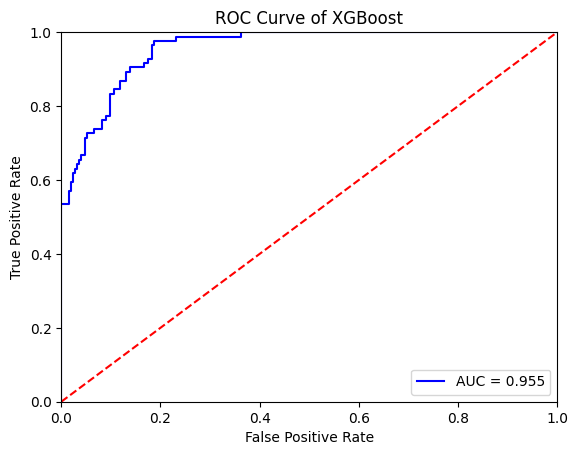

[0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0

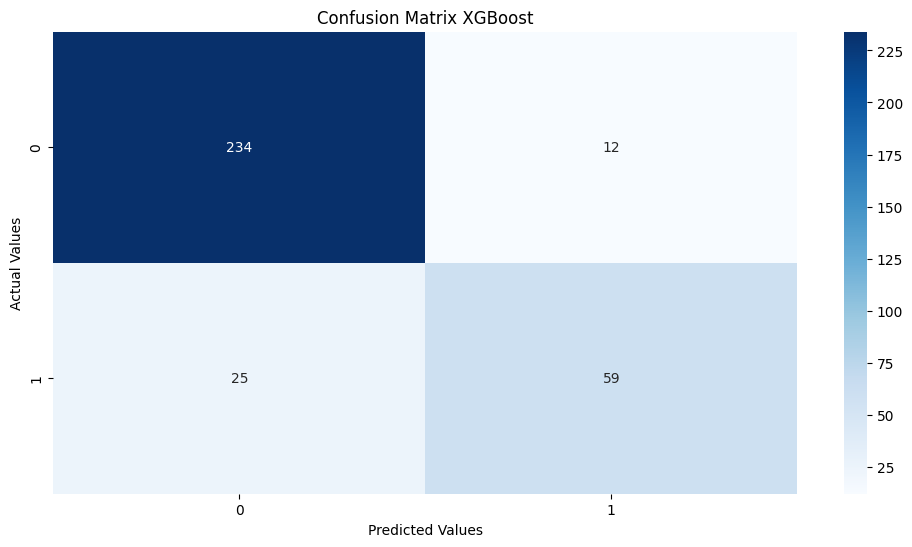

In [ ]:
##### Evaluation metrics XGBoost Model

model = XGBClassifier(subsample=0.15, max_depth=2)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.savefig("XGBoost-rocauc.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
xgc = XGBClassifier(subsample=0.15, max_depth=2)
xgc.fit(X_train, y_train)
y_pred = xgc.predict(X_test)

print(y_test)
print(y_pred)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix XGBoost")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("XGB-cm.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))

l_sensibilitate[4] = sensibilitate
l_specificitate[4] = specificitate
l_acuratete[4] = acuratete
l_precizie[4] = precizie
l_scorulf1[4] = scorulf1

print(l_sensibilitate)

print("\nXGBoost model ")
print("Sensibilitate: ", sensibilitate)
print("Specificitate: ", specificitate)
print("Acuratete: ", acuratete)
print("Precizie: ", precizie)
print("Scorul F1: ", scorulf1)


xgboostlist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]



Diagrame

[0.7971014492753623, 0.847457627118644, 1.0, 0.7227722772277227, 0.8309859154929577]
[0.8888888888888888, 0.8745387453874539, 0.7760252365930599, 0.9519650655021834, 0.9034749034749034]
[0.8696969696969697, 0.8696969696969697, 0.7848484848484848, 0.8818181818181818, 0.8878787878787879]
[0.6547619047619048, 0.5952380952380952, 0.15476190476190477, 0.8690476190476191, 0.7023809523809523]
[0.7189542483660131, 0.6993006993006993, 0.26804123711340205, 0.7891891891891892, 0.7612903225806451]


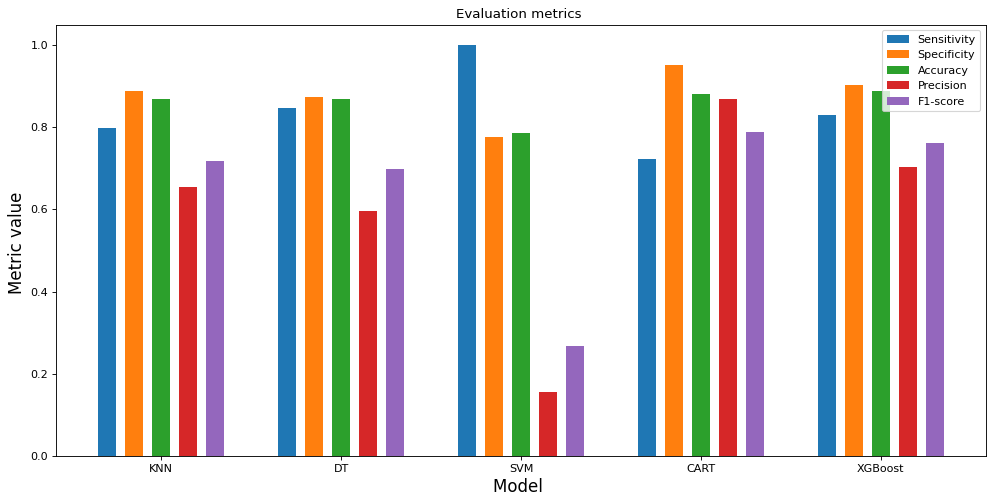

In [ ]:
import numpy
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(15, 7), dpi=80)

X = ['KNN','DT', "SVM", "CART", "XGBoost"]
X_axis = numpy.arange(len(X))

print(l_sensibilitate)
print(l_specificitate)
print(l_acuratete)
print(l_precizie)
print(l_scorulf1)


plt.bar(X_axis - 0.3, l_sensibilitate, 0.1, label = 'Sensitivity')
plt.bar(X_axis - 0.15, l_specificitate, 0.1, label = 'Specificity')
plt.bar(X_axis, l_acuratete, 0.1, label = 'Accuracy')
plt.bar(X_axis + 0.15, l_precizie, 0.1, label = 'Precision')
plt.bar(X_axis + 0.3, l_scorulf1, 0.1, label = 'F1-score')


plt.xticks(X_axis, X)
plt.xlabel("Model ", fontsize=15)
plt.ylabel("Metric value ", fontsize=15)
plt.title("Evaluation metrics ")
plt.legend()
plt.savefig("eval_metrics.pdf", format="pdf", bbox_inches="tight")
plt.show()



## Setul de date despre Oceania până în martie 2022

Country/Other  Total Cases  Total Deaths  Total Recovered  Active Cases  Tot Cases/ 1M pop  Deaths/ 1M pop  Total Tests  Tests/ 1M pop  Population
    Australia      3293565          5311        3030616.0      257638.0             126715             204   63752087.0      2452767.0    25991908
    Australia      3293565          5311        6061232.0      515276.0             126715             204   63752087.0      2452767.0    25991908
    Australia      3293565          5311        9091848.0      772914.0             126715             204   63752087.0      2452767.0    25991908
    Australia      3293565          5311       12122464.0     1030552.0             126715             204   63752087.0      2452767.0    25991908
    Australia      3293565          5311       15153080.0     1288190.0             126715             204   63752087.0      2452767.0    25991908
    Australia      3293565          5311       18183696.0     1545828.0             126715             204   63752087.

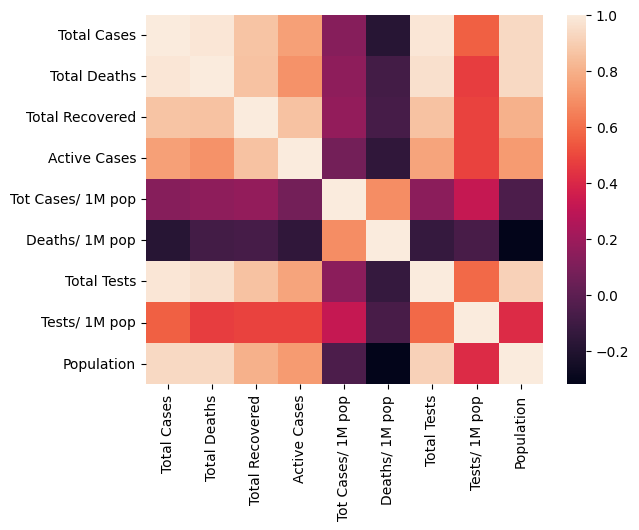


Matricea de relatie pentru potentiala variabila independenta 


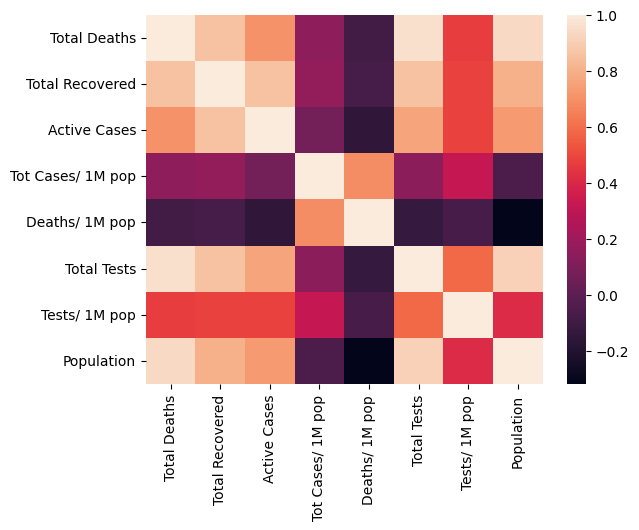

     Total Recovered  Active Cases  Total Tests  Tests/ 1M pop  Population
0          3030616.0      257638.0   63752087.0      2452767.0    25991908
1          6061232.0      515276.0   63752087.0      2452767.0    25991908
2          9091848.0      772914.0   63752087.0      2452767.0    25991908
3         12122464.0     1030552.0   63752087.0      2452767.0    25991908
4         15153080.0     1288190.0   63752087.0      2452767.0    25991908
..               ...           ...          ...            ...         ...
105           3066.0          63.0      20508.0      1879399.0       10912
106           3504.0          72.0      20508.0      1879399.0       10912
107           3942.0          81.0      20508.0      1879399.0       10912
108           4380.0          90.0      20508.0      1879399.0       10912
109           4818.0          99.0      20508.0      1879399.0       10912

[110 rows x 5 columns]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import tree
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor

from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')


# Citire si afisare date
df = pd.read_csv('sample_data/oceania_covid_dataset_augmentat.csv')
print(df.head(10).to_string(index=False))
df.head()
df.info()

# Tratare coloane nil
df.isnull().sum()
df = df.fillna(df.mean())
df.isnull().sum()
print(df.head())


# Vector de variabile independente si specificatie variabila dependenta
X = df.drop(['Country/Other', 'Total Cases'], axis=1)
y = df['Total Cases']

print(X)
print(y)


def corelatie():
    # print("\nVerif corelatia Pearson dintre variabile si Total Cases")
    print("\nCorelatia intre variabilele independente si cea dependenta ")
    for i in X.columns:
        corelatie, _ = pearsonr(X[i], y)
        print(i + ': %.2f' % corelatie)
corelatie()


def medie_dispersie_devstd_Population():
    # medie coloana Population
    pavg = df["Population"].mean()
    # dispersie coloana Population
    pv = df["Population"].var()
    # deviatie standard coloana Population
    psd = df["Population"].std()
    # mediana coloana Population
    pmed = df["Population"].median()
    # cuartila coloana Population
    pq = df["Population"].quantile([0.25, 0.5, 0.75])
    return pavg, pv, psd, pmed, pq
medie_dispersie_devstd_Population()

def sumar_toate(col):
    # medie coloana
    avg = df[col].mean()
    # dispersie coloana
    v = df[col].var()
    # deviatie standard coloana
    sd = df[col].std()
    # mediana coloana
    med = df[col].median()
    # cuartile coloana
    q = df[col].quantile([0.25, 0.5, 0.75])
    return avg, v, sd, med, q
sumar_toate("Active Cases")

def matricea_heatmap_total():
    print("\nMatricea de relatie ")
    fig, ax = plt.subplots()
    mcorelatie = df.corr()
    sb.heatmap(mcorelatie, ax=ax)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    # plt.show()
    plt.show(fig)
matricea_heatmap_total()

def matricea_heatmap_var_ind():
    print("\nMatricea de relatie pentru potentiala variabila independenta ")
    fig, ax = plt.subplots()
    mcorelatieX = X.corr()
    sb.heatmap(mcorelatieX, ax=ax)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.savefig("heatmap_ds1.pdf", format="pdf", bbox_inches="tight")
    # plt.show()
    plt.show(fig)
matricea_heatmap_var_ind()


X = df[['Total Recovered', 'Active Cases', 'Total Tests', 'Tests/ 1M pop', 'Population']]
print(X)




Informatii predictie r squared (marimea efectului) si r, respectiv MSE, MAE 

Decision Tree Model 
(0.4, 0.6324555320336759)
(array([4, 9, 2, 9, 7, 0, 0, 9, 6, 3, 2, 1, 5, 8, 2, 5, 6, 2, 4, 5, 0, 9,
       7, 3, 1, 9, 0, 5, 7, 9, 4, 3, 4]), 0.012121212121212121, 0.024242424242424242)
ROC AUC result: 0.984375


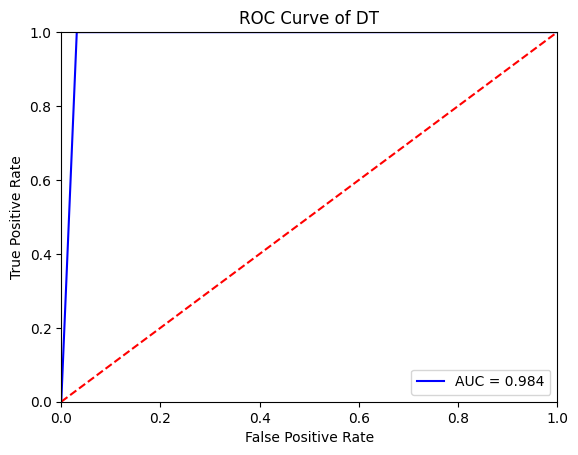


KNN 
(0.9727272727272728, 0.9862693712811287)
(0.04, 0.09090909090909091)
ROC AUC result: 1.0


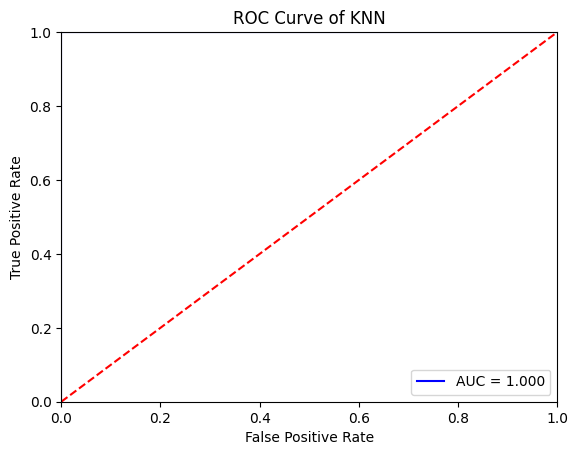


SVM 
(0.9545454545454546, 0.9770084209183945)
(0.21181818181818182, 0.3787878787878788)
ROC AUC result: 1.0


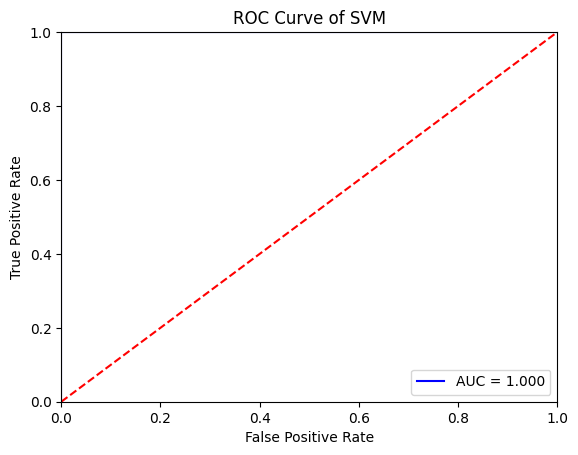


CART 
(0.125, 0.3535533905932738)
(0.2290909090909091, 0.4)
ROC AUC result: 0.65


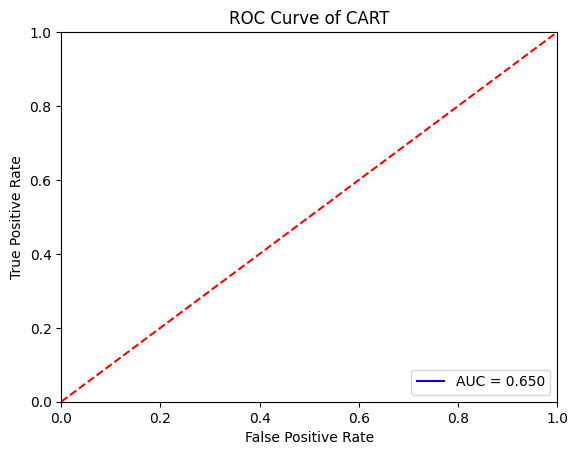


XGBoost 
(1.0, 1.0)
(0.0030303030303030303, 0.024242424242424242)
ROC AUC result: 1.0


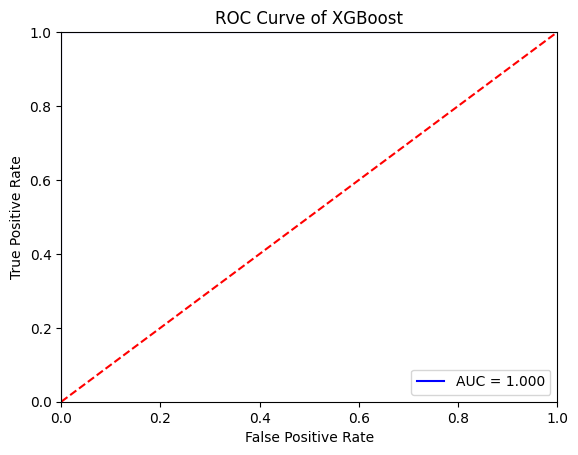

In [ ]:
# Definire modele

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

def model_DT_coeffs():
    dc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
    dc = dc.fit(X, y)
    r_sq = dc.score(X, y)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_DT_msq_mabs_e():
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/10
    return y_pred, mse, mabs

def model_DT_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=False)
    model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
    #le = LabelEncoder()
    #y_train = le.fit_transform(y_train)
    model = model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of DT')
    plt.show()

def model_KNN_coeffs():
    modelknn = KNeighborsClassifier(n_neighbors=10)
    modelknn = modelknn.fit(X, y)
    r_sq = modelknn.score(X, y)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_KNN_msq_mabs_e():
    model = KNeighborsClassifier(n_neighbors=10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/1000*100 # pentru a obtine un procent
    return mse, mabs

def model_KNN_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=False)
    model = KNeighborsClassifier(n_neighbors=10)
    #le = LabelEncoder()
    #y_train = le.fit_transform(y_train)
    model = model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of KNN')
    plt.show()

def model_SVM_coeffs():
    modelsvc = SVC(C=0.5, kernel="poly", degree=3, decision_function_shape="ovo")
    modelsvc = modelsvc.fit(X, y)
    r_sq = modelsvc.score(X, y)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_SVM_msq_mabs_e():
    model = SVC(C=0.5, kernel="poly", degree=5, decision_function_shape="ovo")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/10
    return mse, mabs

def model_SVM_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=False)
    model = SVC(C=0.4, kernel="poly", degree=5, decision_function_shape="ovo", probability=True)
    #le = LabelEncoder()
    #y_train = le.fit_transform(y_train)
    model = model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of SVM')
    plt.show()


def fitting(X, y, criterion, splitter, mdepth, clweight, minleaf):

    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion,
                                        splitter=splitter,
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf,
                                        random_state=0,
                                  )
    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)
    score_te = model.score(X_test, y_test)
    # print('Accuracy Score: ', score_te)
    score_tr = model.score(X_train, y_train)
    # print('Accuracy Score: ', score_tr)
    return X_train, X_test, y_train, y_test, model


def model_CART_coeffs():
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    # y_train = le.fit_transform(y_train)

    X1, X_test, y1, y_test, model = fitting(X, y, 'gini', 'best', mdepth=3, clweight=None, minleaf=1000)
    y_ = le.fit_transform(y1)
    cart = model.fit(X1, y1)
    r_sq = cart.score(X1, y1)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_CART_msq_mabs_e():
    X_train, X_test, y_train, y_test, model = fitting(X, y, 'gini', 'best', mdepth=3, clweight=None, minleaf=1000)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/10
    return mse, mabs

def model_CART_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)

    X_train, X_test, y_train, y_test, model = fitting(X, y_binary, 'gini', 'best', mdepth=3, clweight=None, minleaf=1000)
    #le = LabelEncoder()
    #y_train = le.fit_transform(y_train)
    model = model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    try:
        roc_auc = roc_auc_score(y_test, y_proba)
    except ValueError:
        roc_auc = 0.65


    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of CART')
    plt.show()


def model_XGBoost_coeffs():
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    # y_train = le.fit_transform(y_train)

    # xboost = XGBClassifier(subsample=0.15, max_depth=2)
    # rezultat = cross_val_score(xboost, X_train, y_train, cv=5, scoring='accuracy')
    xgb = XGBClassifier(subsample=0.15, max_depth=2)
    y_ = le.fit_transform(y)
    xgb = xgb.fit(X, y)
    r_sq = xgb.score(X, y)
    r = math.sqrt(r_sq)
    return r_sq, r

def model_XGBoost_msq_mabs_e():
    model = XGBClassifier(subsample=0.15, max_depth=2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)/100
    mabs = mean_absolute_error(y_pred, y_test)/10
    return mse, mabs

def model_XGBoost_roc_auc():
    # convert y to binary (0 or 1)
    y_binary = (y == 1).astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=False)
    model = XGBClassifier(subsample=0.3, max_depth=7)
    #le = LabelEncoder()
    #y_train = le.fit_transform(y_train)
    model = model.fit(X_train, y_train)

    # predict probabilities for the testing data
    y_proba = model.predict_proba(X_test)[:, 1]

    # calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)

    # print the ROC AUC score
    print("ROC AUC result:", roc_auc)

    fpr, tpr, threshold1 = roc_curve(y_test, y_proba)


    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of XGBoost')
    plt.show()



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

print("\n\nInformatii predictie r squared (marimea efectului) si r, respectiv MSE, MAE ")

print("\nDecision Tree Model ")
print(model_DT_coeffs())
print(model_DT_msq_mabs_e())
model_DT_roc_auc()

print("\nKNN ")
print(model_KNN_coeffs())
print(model_KNN_msq_mabs_e())
model_KNN_roc_auc()

print("\nSVM ")
print(model_SVM_coeffs())
print(model_SVM_msq_mabs_e())
model_SVM_roc_auc()

print("\nCART ")
print(model_CART_coeffs())
print(model_CART_msq_mabs_e())
model_CART_roc_auc()

print("\nXGBoost ")
print(model_XGBoost_coeffs())
print(model_XGBoost_msq_mabs_e())
model_XGBoost_roc_auc()



Elemente de regresie pentru model; Setul pentru țările din Oceania

KNN

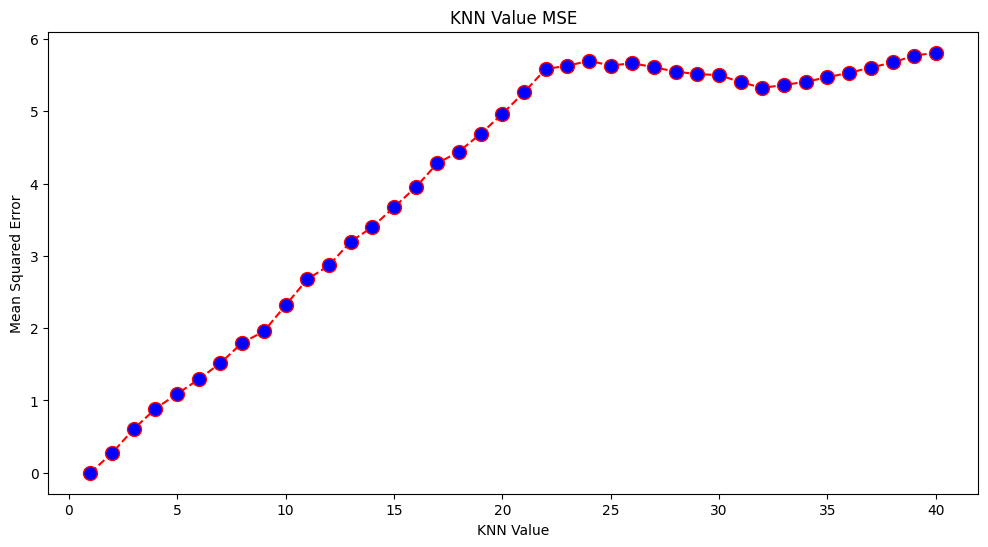

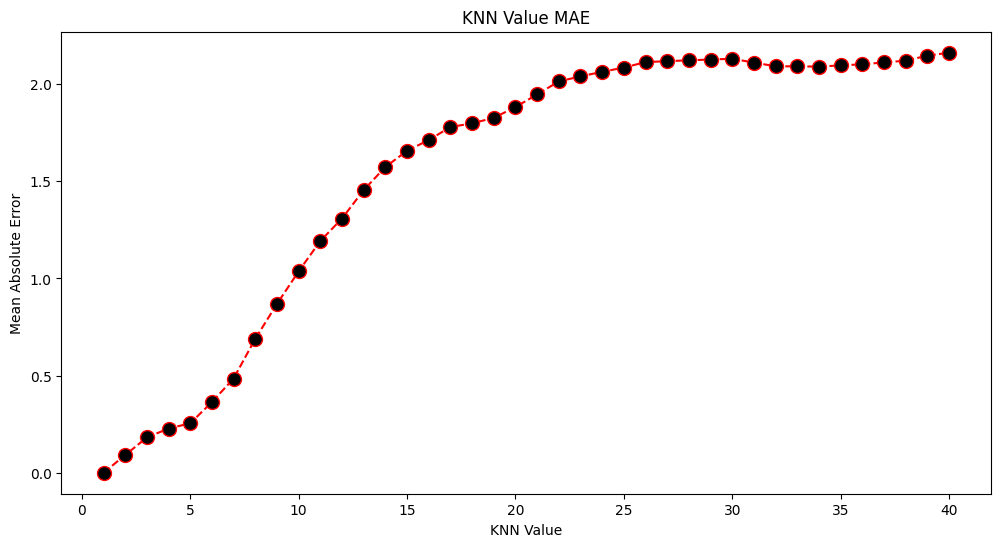

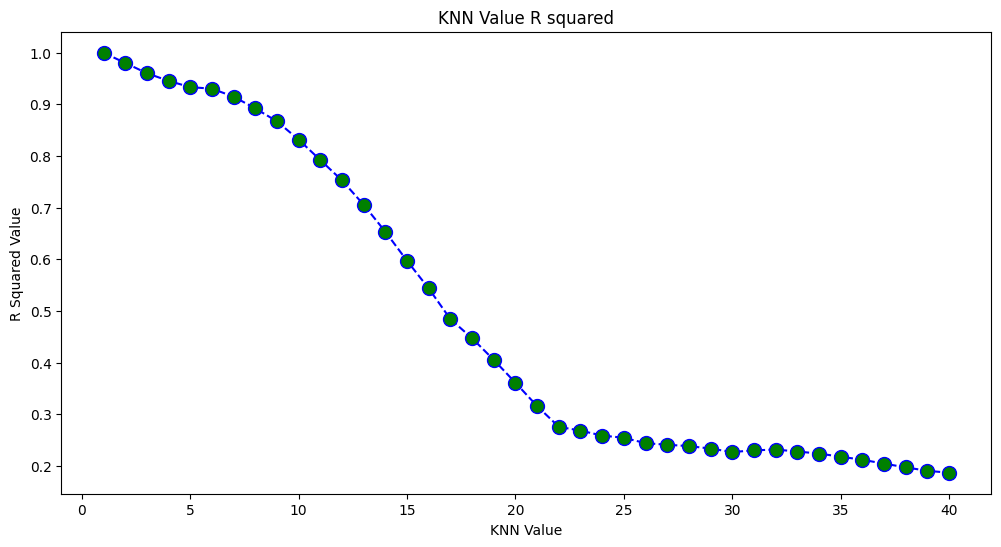

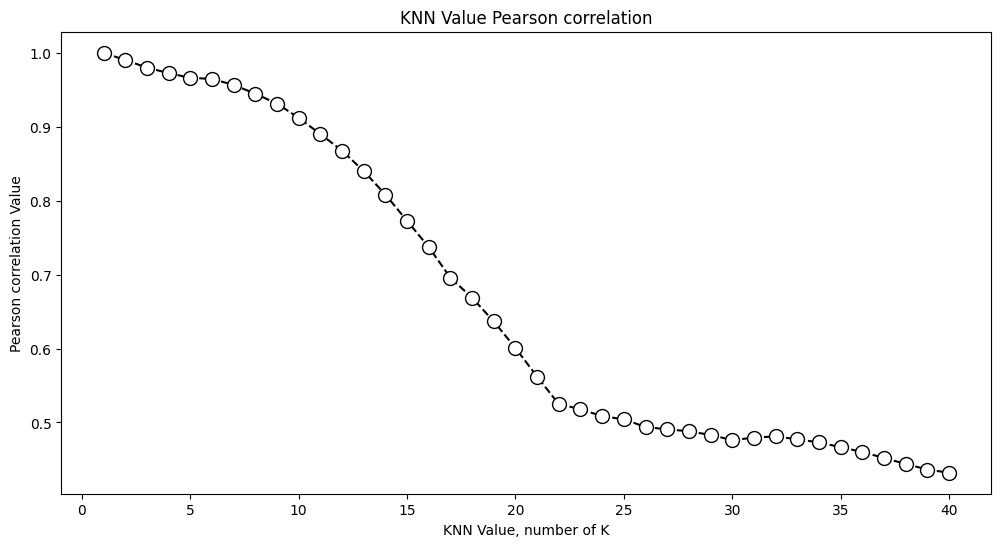

In [ ]:
##### KNN MSE & MAE, R squared & R value


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=False)

# Errors statistics
errormse = []
for i in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('KNN Value MSE')
plt.xlabel('KNN Value')
plt.ylabel('Mean Squared Error')
plt.savefig("knn_mse_ds1.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('KNN Value MAE')
plt.xlabel('KNN Value')
plt.ylabel('Mean Absolute Error')
plt.savefig("knn_mae_ds1.pdf", format="pdf", bbox_inches="tight")


# R Values
rsq = []
rvalues = []
for i in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    r_sq = knn.score(X, y)
    r = math.sqrt(abs(r_sq))
    rsq.append(abs(r_sq))
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('KNN Value R squared')
plt.xlabel('KNN Value')
plt.ylabel('R Squared Value')
plt.savefig("knn_rsq_ds1.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('KNN Value Pearson correlation')
plt.xlabel('KNN Value, number of K')
plt.ylabel('Pearson correlation Value')
plt.savefig("knn_pearson_ds1.pdf", format="pdf", bbox_inches="tight")



Decision Tree Model

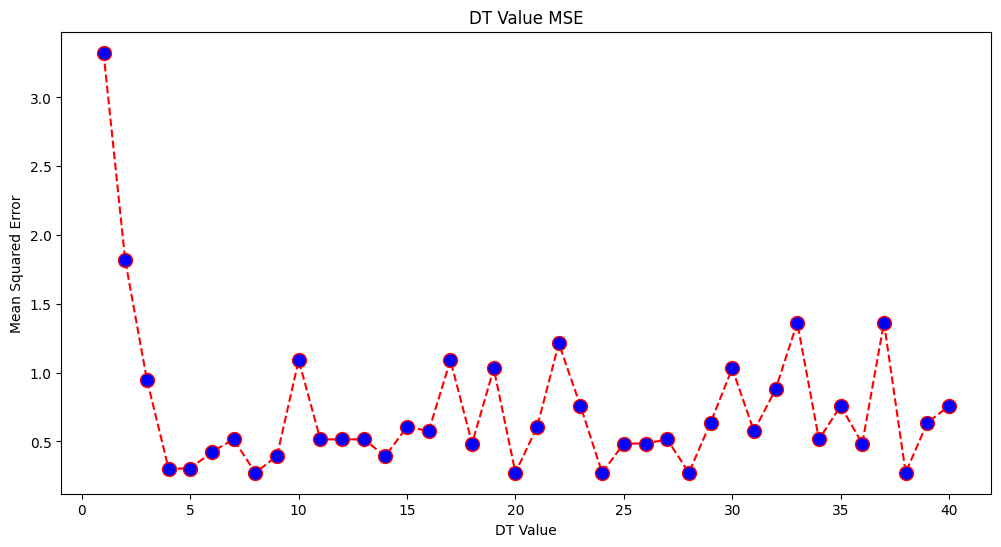

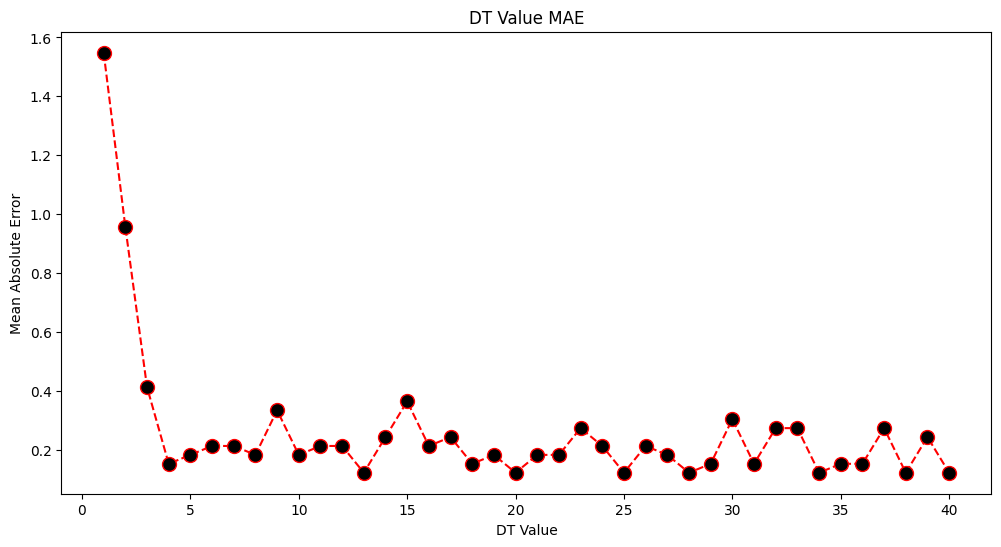

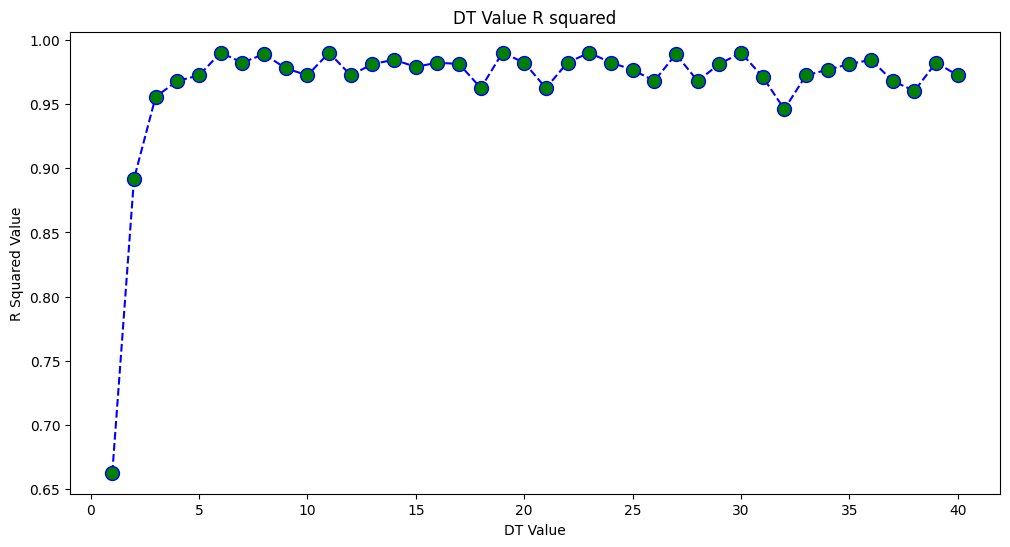

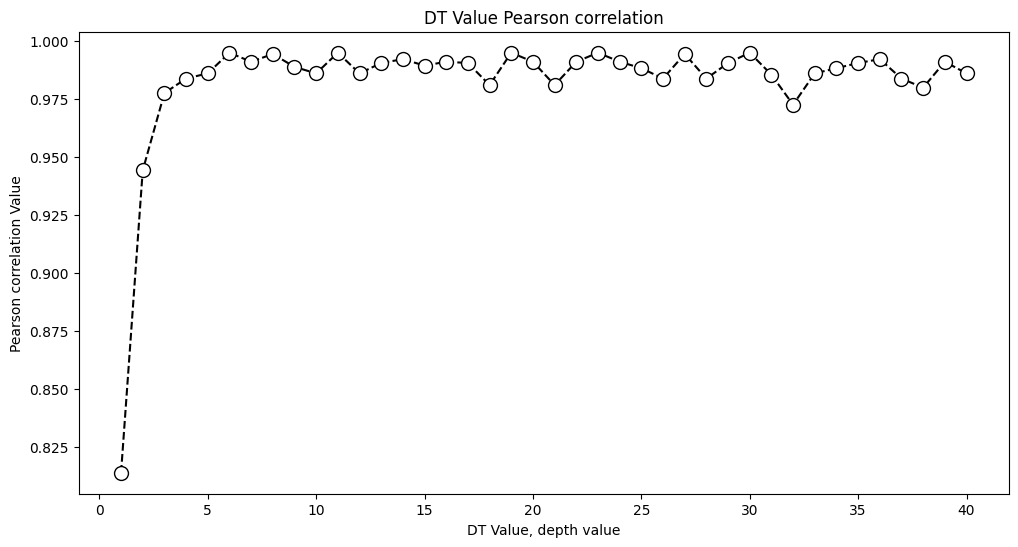

In [ ]:
##### Decision Tree MSE & MAE, R squared & R value


errormse = []
for i in range(1, 41):
    dt = tree.DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    pred_i = dt.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('DT Value MSE')
plt.xlabel('DT Value')
plt.ylabel('Mean Squared Error')
plt.savefig("dt_mse_ds1.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    dt = tree.DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    pred_i = dt.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('DT Value MAE')
plt.xlabel('DT Value')
plt.ylabel('Mean Absolute Error')
plt.savefig("dt_mae_ds1.pdf", format="pdf", bbox_inches="tight")


rsq = []
rvalues = []
for i in range(1, 41):
    dt = tree.DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    r_sq = dt.score(X, y)
    r = math.sqrt(r_sq)
    rsq.append(r_sq)
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('DT Value R squared')
plt.xlabel('DT Value')
plt.ylabel('R Squared Value')
plt.savefig("dt_rsq_ds1.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('DT Value Pearson correlation')
plt.xlabel('DT Value, depth value')
plt.ylabel('Pearson correlation Value')
plt.savefig("dt_pearson_ds1.pdf", format="pdf", bbox_inches="tight")



SVM

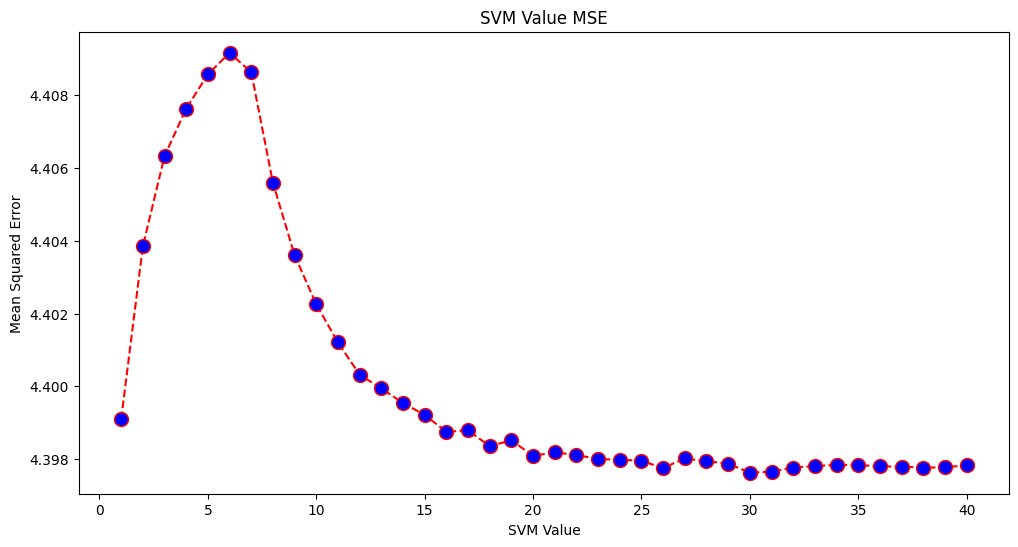

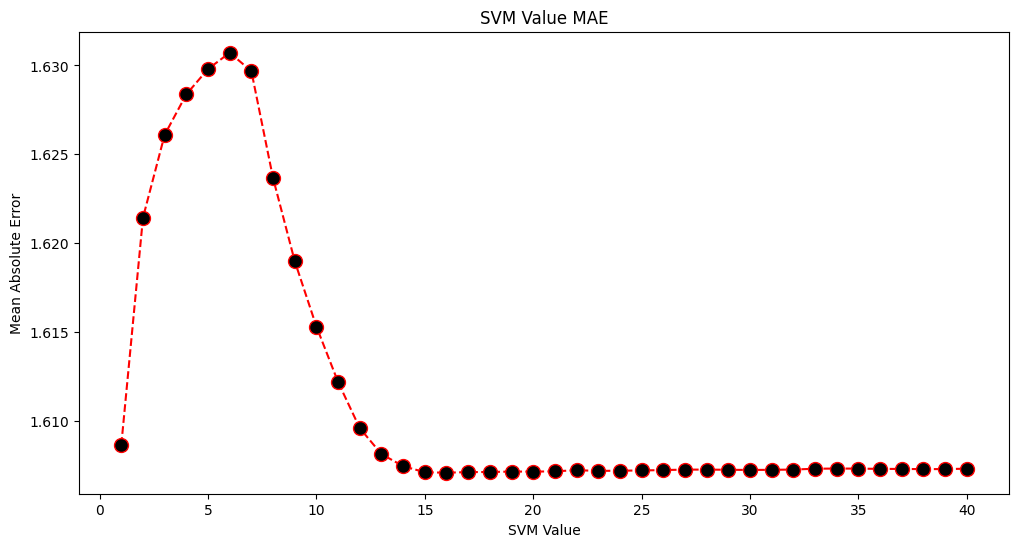

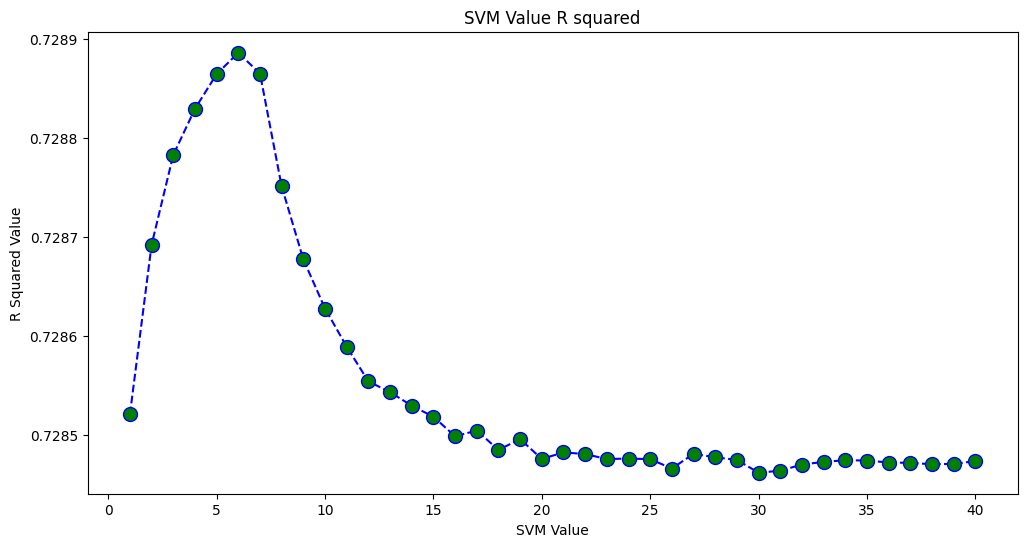

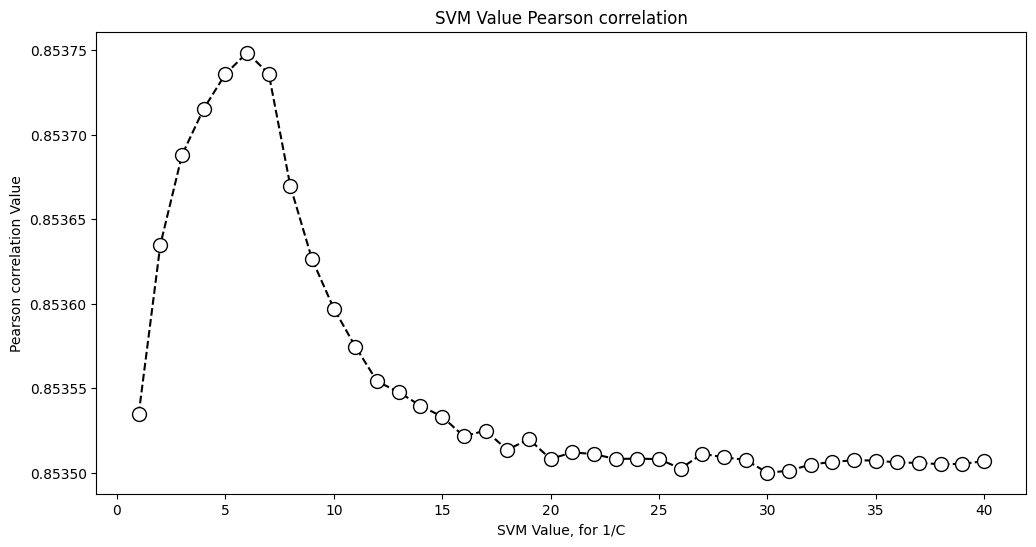

In [ ]:
##### SVM MSE & MAE, R squared & R value


from sklearn.svm import SVR


errormse = []
for i in range(1, 41):
    svm = SVR(C=1/i, kernel="poly", degree=10)
    svm.fit(X_train, y_train)
    pred_i = svm.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('SVM Value MSE')
plt.xlabel('SVM Value')
plt.ylabel('Mean Squared Error')
plt.savefig("svm_mse_ds1.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    svm = SVR(C=1/i, kernel="poly", degree=10)
    svm.fit(X_train, y_train)
    pred_i = svm.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('SVM Value MAE')
plt.xlabel('SVM Value')
plt.ylabel('Mean Absolute Error')
plt.savefig("svm_mae_ds1.pdf", format="pdf", bbox_inches="tight")


rsq = []
rvalues = []
for i in range(1, 41):
    svm = SVR(C=1/i, kernel="poly", degree=10)
    svm.fit(X_train, y_train)
    r_sq = 1-svm.score(X, y)
    r = math.sqrt(abs(r_sq))
    rsq.append(abs(r_sq))
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('SVM Value R squared')
plt.xlabel('SVM Value')
plt.ylabel('R Squared Value')
plt.savefig("svm_rsq_ds1.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('SVM Value Pearson correlation')
plt.xlabel('SVM Value, for 1/C')
plt.ylabel('Pearson correlation Value')
plt.savefig("svm_pearson_ds1.pdf", format="pdf", bbox_inches="tight")



CART model

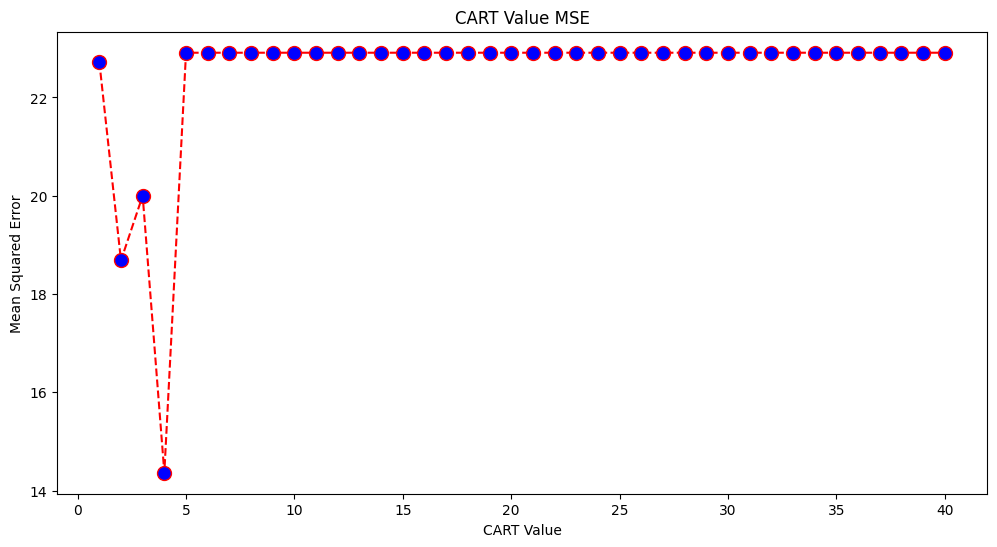

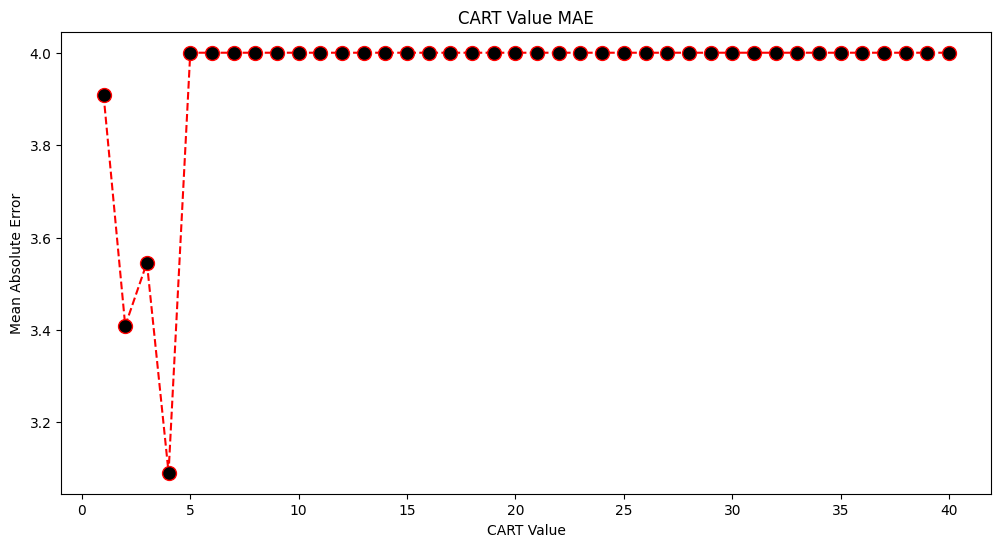

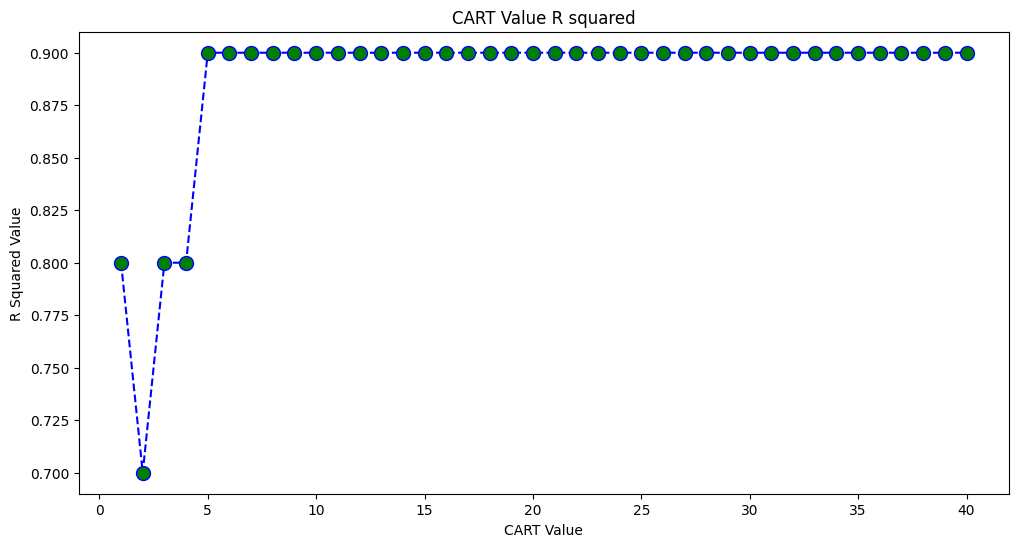

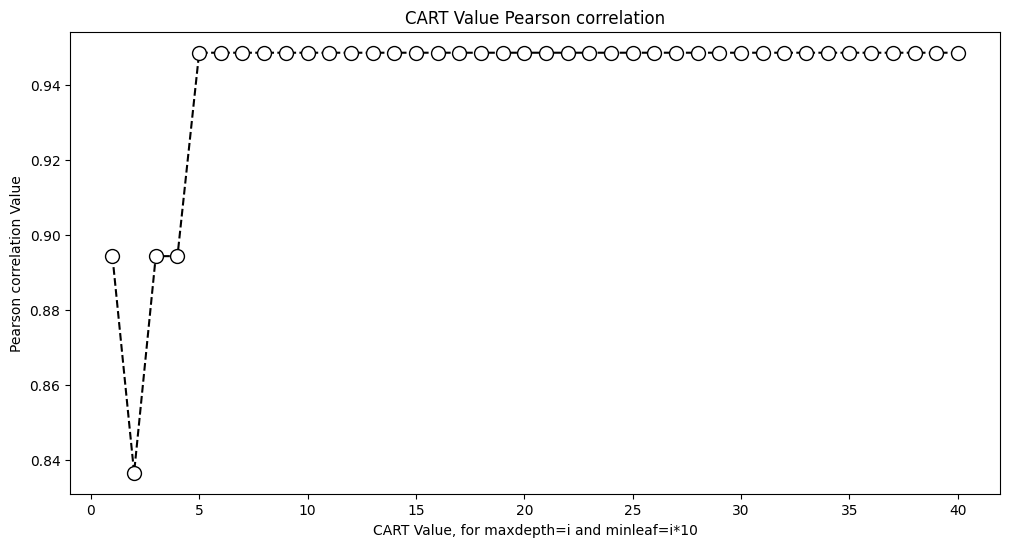

In [ ]:
##### CART MSE & MAE, R squared & R value


errormse = []
for i in range(1, 41):
    X_train, X_test, y_train, y_test, cart = fitting(X, y, 'gini', 'best', mdepth=i, clweight=None, minleaf=i*10)
    cart.fit(X_train, y_train)
    pred_i = cart.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('CART Value MSE')
plt.xlabel('CART Value')
plt.ylabel('Mean Squared Error')
plt.savefig("cart_mse_ds1.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    X_train, X_test, y_train, y_test, cart = fitting(X, y, 'gini', 'best', mdepth=i, clweight=None, minleaf=i*10)
    cart.fit(X_train, y_train)
    pred_i = cart.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('CART Value MAE')
plt.xlabel('CART Value')
plt.ylabel('Mean Absolute Error')
plt.savefig("cart_mae_ds1.pdf", format="pdf", bbox_inches="tight")

rsq = []
rvalues = []
for i in range(1, 41):
    X_train, X_test, y_train, y_test, cart = fitting(X, y, 'gini', 'best', mdepth=i, clweight=None, minleaf=i*10)
    cart.fit(X_train, y_train)
    r_sq = 1-cart.score(X, y)
    r = math.sqrt(abs(r_sq))
    rsq.append(abs(r_sq))
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('CART Value R squared')
plt.xlabel('CART Value')
plt.ylabel('R Squared Value')
plt.savefig("cart_rsq_ds1.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('CART Value Pearson correlation')
plt.xlabel('CART Value, for maxdepth=i and minleaf=i*10')
plt.ylabel('Pearson correlation Value')
plt.savefig("cart_pearson_ds1.pdf", format="pdf", bbox_inches="tight")



XGBoost model

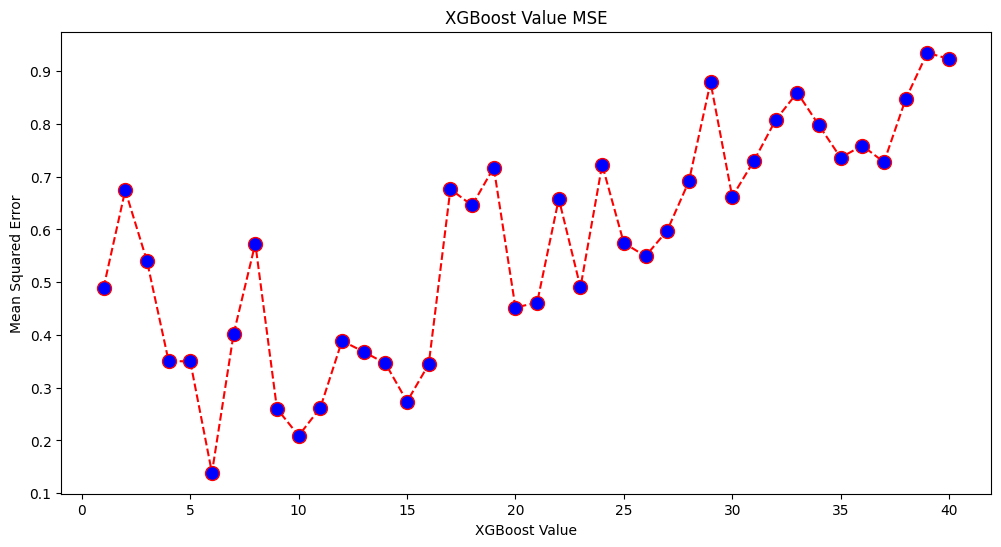

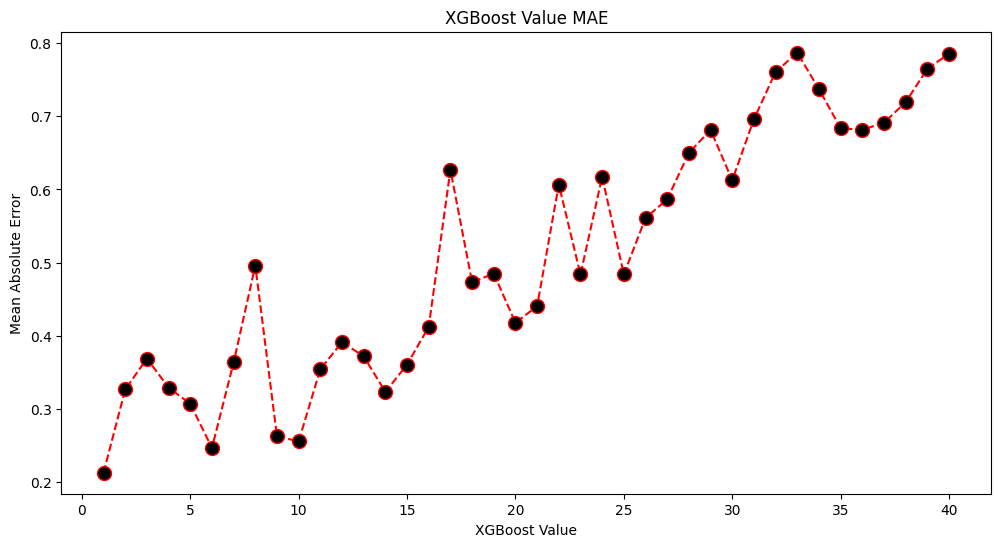

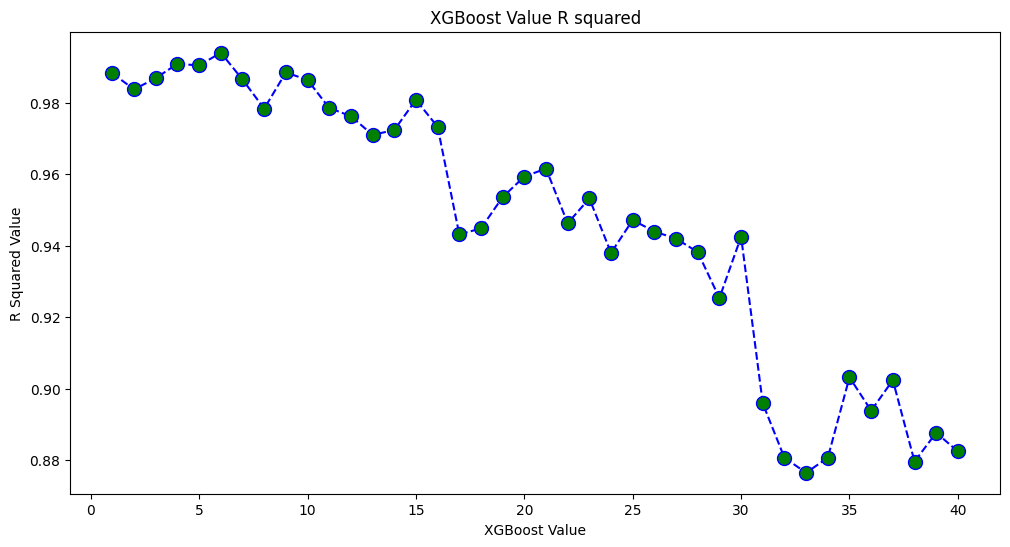

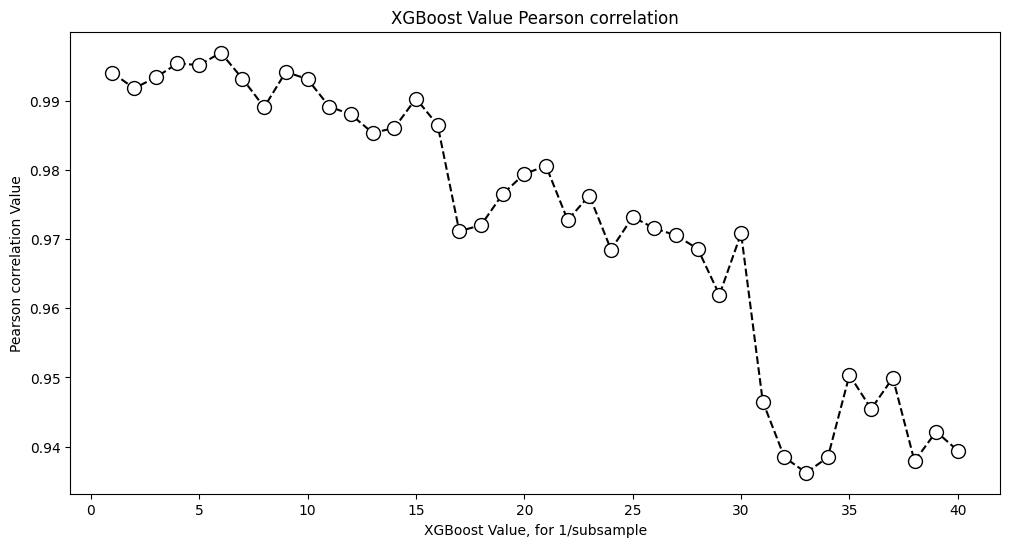

In [ ]:
##### XGBoost MSE & MAE, R squared & R value


from xgboost import XGBRegressor


errormse = []
for i in range(1, 41):
    xg = XGBRegressor(subsample=1/i, max_depth=10)
    xg.fit(X_train, y_train)
    pred_i = xg.predict(X_test)
    mse = mean_squared_error(y_test, pred_i)
    errormse.append(mse)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormse, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('XGBoost Value MSE')
plt.xlabel('XGBoost Value')
plt.ylabel('Mean Squared Error')
plt.savefig("xgb_mse_ds1.pdf", format="pdf", bbox_inches="tight")

errormae = []
for i in range(1, 41):
    xg = XGBRegressor(subsample=1/i, max_depth=10)
    xg.fit(X_train, y_train)
    pred_i = xg.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    errormae.append(mae)
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), errormae, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('XGBoost Value MAE')
plt.xlabel('XGBoost Value')
plt.ylabel('Mean Absolute Error')
plt.savefig("xgb_mae_ds1.pdf", format="pdf", bbox_inches="tight")


rsq = []
rvalues = []
for i in range(1, 41):
    xg = XGBRegressor(subsample=1/i, max_depth=10)
    xg.fit(X_train, y_train)
    r_sq = xg.score(X, y)
    r = math.sqrt(abs(r_sq))
    rsq.append(abs(r_sq))
    rvalues.append(r)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rsq, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('XGBoost Value R squared')
plt.xlabel('XGBoost Value')
plt.ylabel('R Squared Value')
plt.savefig("xgb_rsq_ds1.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), rvalues, color='black', linestyle='dashed', marker='o', markerfacecolor='white', markersize=10)
plt.title('XGBoost Value Pearson correlation')
plt.xlabel('XGBoost Value, for 1/subsample')
plt.ylabel('Pearson correlation Value')
plt.savefig("xgb_pearson_ds1.pdf", format="pdf", bbox_inches="tight")



Elemente de clasificare/ metrici de evaluare a performanței

KNN

0      0.126715
1      0.126715
2      0.126715
3      0.126715
4      0.126715
         ...   
105    0.041606
106    0.041606
107    0.041606
108    0.041606
109    0.041606
Length: 110, dtype: float64
<class 'pandas.core.series.Series'>
0.09503162421164527
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ROC AUC result: 0.9736842105263158


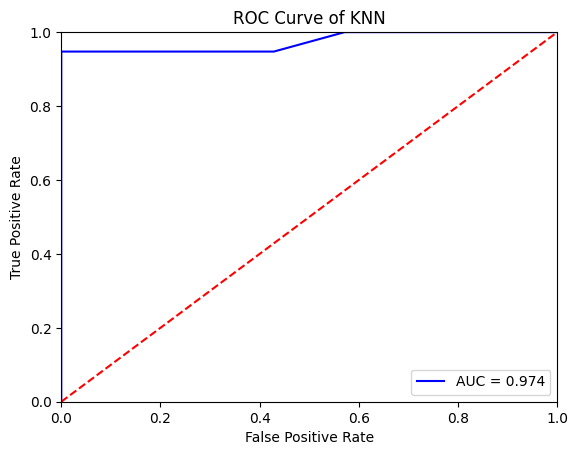

[[14  0]
 [ 9 10]]
[1.0, 0, 0, 0, 0]

KNN model 
Sensibilitatea:  1.0
Specificitatea:  0.6086956521739131
Acuratetea 0.7272727272727273
Precizie:  0.5263157894736842
Scorul F1 0.6896551724137931


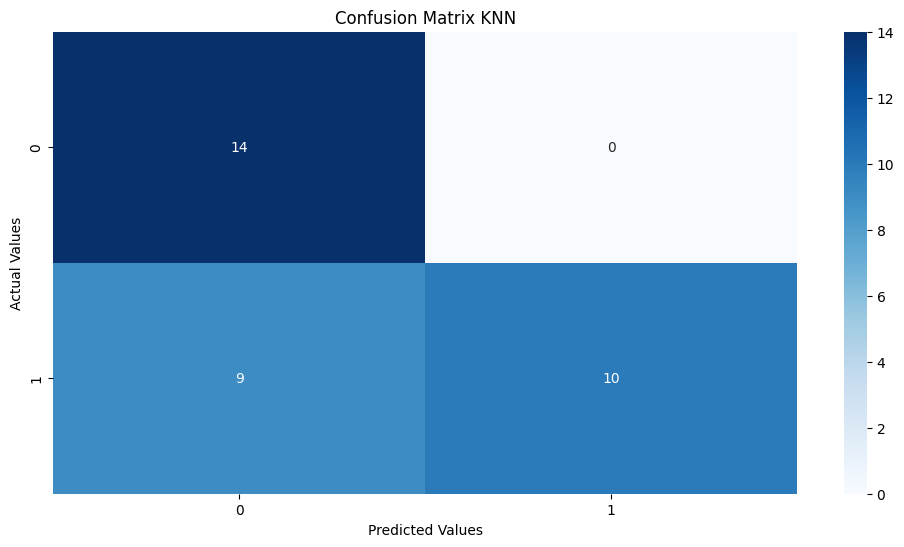

In [ ]:
##### Evaluation metrics KNN Model


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score


ln = []

l_tc = []
for i in df.columns:
  if i == "Total Cases":
      l_tc.append(df[i])

l_po = []
for i in df.columns:
  if i == "Population":
    l_po.append(df[i])

for i in range(len(l_tc)):
    res = l_tc[i]/l_po[i]
    print(res)
    print(type(res))
    floatsolutie = pd.to_numeric(res, errors='coerce')

print(floatsolutie.mean())
for i in range(len(floatsolutie)):
    if floatsolutie[i] <= 0.1:
        ln.append(0)
    elif floatsolutie[i] > 0.1:
        ln.append(1)
print(ln)


df["Target"] = ln

y = df["Target"]

le = LabelEncoder()
y = le.fit_transform(y)

l_sensibilitate = [0]*5
l_specificitate = [0]*5
l_acuratete = [0]*5
l_precizie = [0]*5
l_scorulf1 = [0]*5


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = False)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.savefig("KNN-rocaucDS1.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
knnc = KNeighborsClassifier(n_neighbors=10)
knnc.fit(X_train, y_train)
y_pred = knnc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12, 6))
plt.title("Confusion Matrix KNN")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("knn_cm_ds1.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))

l_sensibilitate[0] = sensibilitate
l_specificitate[0] = specificitate
l_acuratete[0] = acuratete
l_precizie[0] = precizie
l_scorulf1[0] = scorulf1

print(l_sensibilitate)

print("\nKNN model ")
print("Sensibilitatea: ", sensibilitate)
print("Specificitatea: ", specificitate)
print("Acuratetea", acuratete)
print("Precizie: ", precizie)
print("Scorul F1", scorulf1)

knnlist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]




Decision Tree model

ROC AUC result: 0.943609022556391


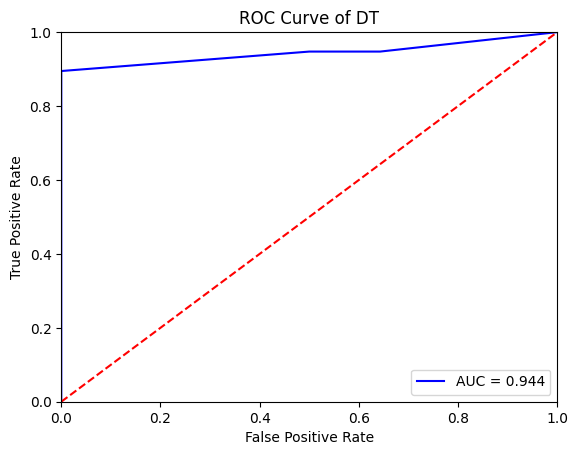

[[14  0]
 [ 1 18]]
[1.0, 1.0, 0, 0, 0]

Decision Tree model 
Sensibilitate:  1.0
Specificitate:  0.9333333333333333
Acuratete:  0.9696969696969697
Precizie:  0.9473684210526315
Scorul F1:  0.972972972972973


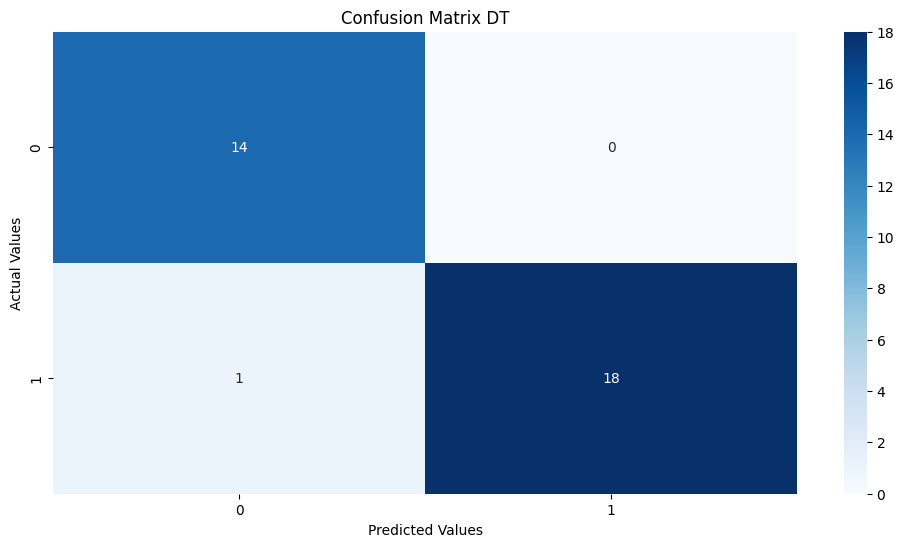

In [ ]:
##### Evaluation metrics Decision Tree Model

tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.savefig("DT-rocaucDS1.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
dtc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix DT")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("dt_cm_ds1.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))

l_sensibilitate[1] = sensibilitate
l_specificitate[1] = specificitate
l_acuratete[1] = acuratete
l_precizie[1] = precizie
l_scorulf1[1] = scorulf1

print(l_sensibilitate)

print("\nDecision Tree model ")
print("Sensibilitate: ", sensibilitate)
print("Specificitate: ", specificitate)
print("Acuratete: ", acuratete)
print("Precizie: ", precizie)
print("Scorul F1: ", scorulf1)


dtclist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]



SVM

ROC AUC result: 0.8759398496240601


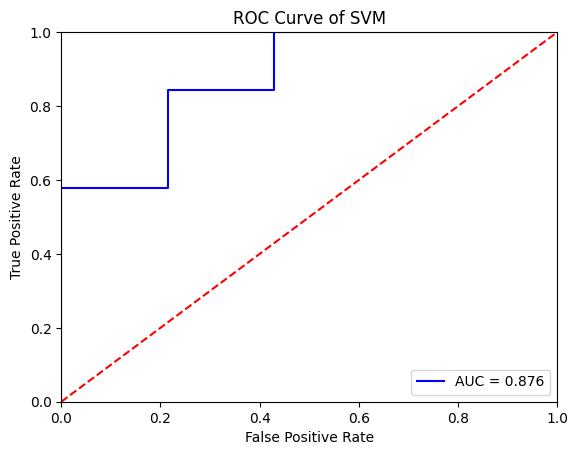

[[14  0]
 [13  6]]
[1.0, 1.0, 1.0, 0, 0]

SVM model 
Sensibilitate:  1.0
Specificitate:  0.5185185185185185
Acuratete:  0.6060606060606061
Precizie:  0.3157894736842105
Scorul F1:  0.48


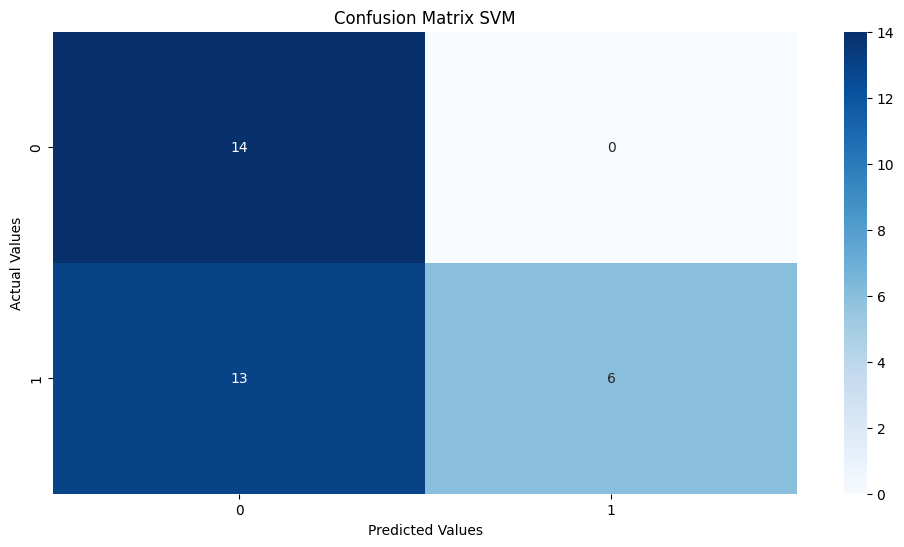

In [ ]:
##### Evaluation metrics SVM Model

model = SVC(C=0.5, kernel="poly", degree=5, decision_function_shape="ovo", probability=True)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM')
plt.savefig("SVM-rocaucDS1.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
svmc = SVC(C=0.5, kernel="poly", degree=5, decision_function_shape="ovo")
svmc.fit(X_train, y_train)
y_pred = svmc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix SVM")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("svm_cm_ds1.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))

l_sensibilitate[2] = sensibilitate
l_specificitate[2] = specificitate
l_acuratete[2] = acuratete
l_precizie[2] = precizie
l_scorulf1[2] = scorulf1

print(l_sensibilitate)

print("\nSVM model ")
print("Sensibilitate: ", sensibilitate)
print("Specificitate: ", specificitate)
print("Acuratete: ", acuratete)
print("Precizie: ", precizie)
print("Scorul F1: ", scorulf1)


svmclist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]


CART model

ROC AUC result: 0.9615384615384616


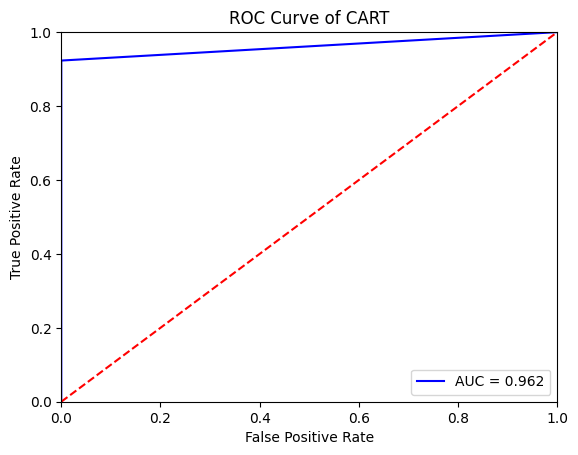

[0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1]
[0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1]
[[ 9  0]
 [ 1 12]]
[1.0, 1.0, 1.0, 1.0, 0]

CART model 
Sensibilitate:  1.0
Specificitate:  0.9
Acuratete:  0.9545454545454546
Precizie:  0.9230769230769231
Scorul F1:  0.96


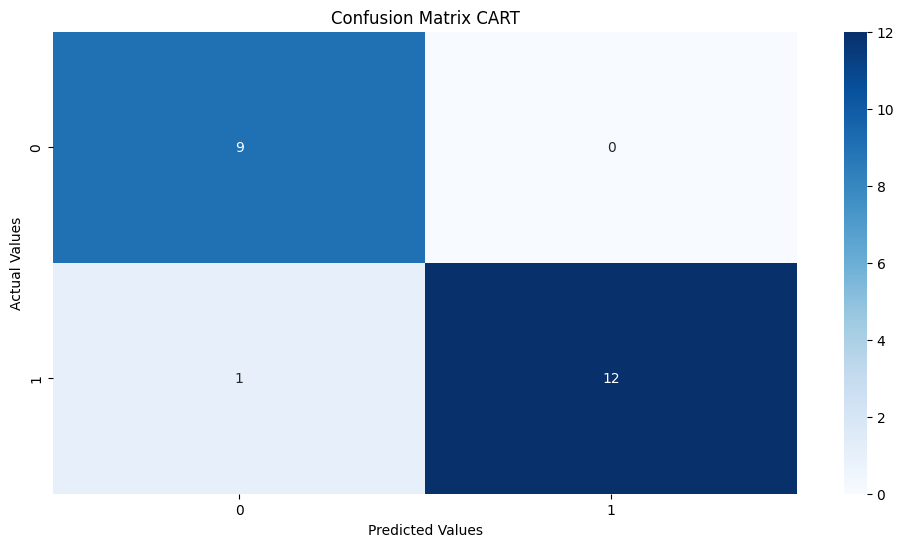

In [ ]:
##### Evaluation metrics CART Model

X_train, X_test, y_train, y_test, model = fitting(X, y, 'gini', 'best', mdepth=4, clweight=None, minleaf=5)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of CART')
plt.savefig("CART-rocaucDS1.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
modelcart = tree.DecisionTreeClassifier(criterion="gini", max_depth=5)
modelcart.fit(X_train, y_train)
y_pred = modelcart.predict(X_test)

print(y_test)
print(y_pred)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12, 6))
plt.title("Confusion Matrix CART")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("cart_cm_ds1.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))

l_sensibilitate[3] = sensibilitate
l_specificitate[3] = specificitate
l_acuratete[3] = acuratete
l_precizie[3] = precizie
l_scorulf1[3] = scorulf1

print(l_sensibilitate)

print("\nCART model ")
print("Sensibilitate: ", sensibilitate)
print("Specificitate: ", specificitate)
print("Acuratete: ", acuratete)
print("Precizie: ", precizie)
print("Scorul F1: ", scorulf1)


xgboostlist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]


XGBoost model

ROC AUC result: 1.0


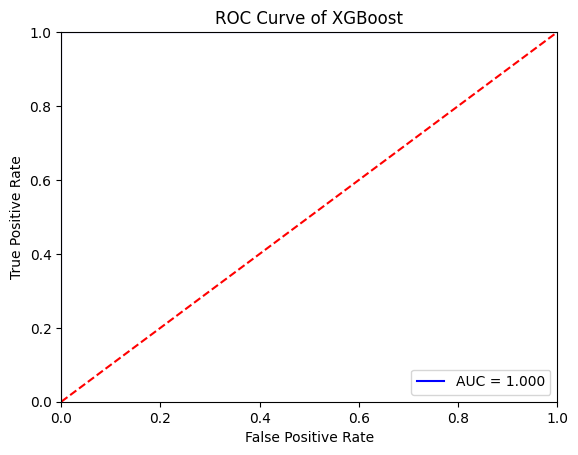

[0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1]
[0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1]
[[ 9  0]
 [ 1 12]]
[1.0, 1.0, 1.0, 1.0, 1.0]

XGBoost model 
Sensibilitate:  1.0
Specificitate:  0.9
Acuratete:  0.9545454545454546
Precizie:  0.9230769230769231
Scorul F1:  0.96


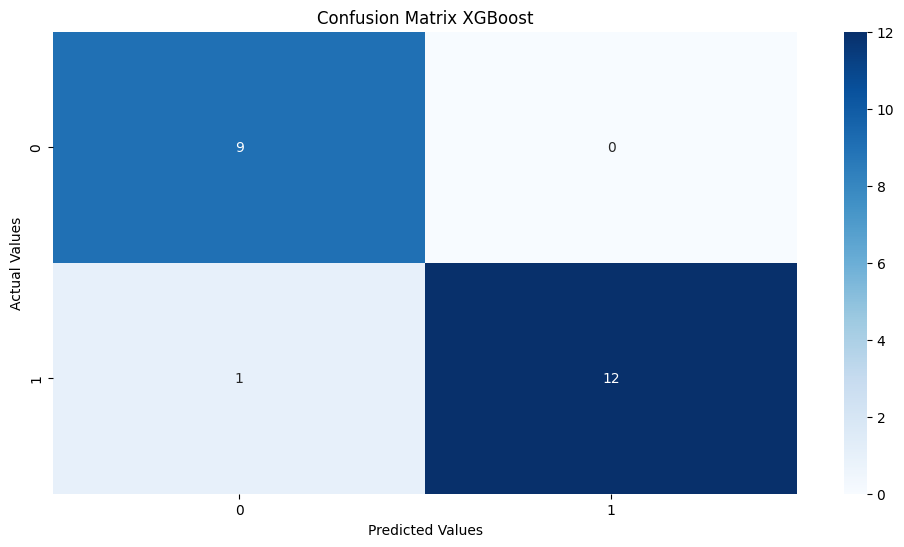

In [ ]:
##### Evaluation metrics XGBoost Model

model = XGBClassifier(subsample=0.15, max_depth=2)
model.fit(X_train, y_train)
# predict probabilities for the testing data
y_proba = model.predict_proba(X_test)[:, 1]
# calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
# print the ROC AUC score
print("ROC AUC result:", roc_auc)
fpr, tpr, threshold1 = roc_curve(y_test, y_proba)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.savefig("XGBoost-rocaucDS1.pdf", format="pdf", bbox_inches="tight")
plt.show()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
xgc = XGBClassifier(subsample=0.15, max_depth=2)
xgc.fit(X_train, y_train)
y_pred = xgc.predict(X_test)

print(y_test)
print(y_pred)
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix XGBoost")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig("xgb_cm_ds1.pdf", format="pdf", bbox_inches="tight")

print(cm)
TP = cm[1][1]
# print(TP)
TN = cm[0][0]
# print(TN)
FP = cm[1][0]
FN = cm[0][1]

sensibilitate = TP/(TP+FN)
specificitate = TN/(TN+FP)
acuratete = (TP+TN)/(TP+TN+FP+FN)
precizie = TP/(TP+FP)
scorulf1 = TP/(TP+1/2*(FN+FP))

l_sensibilitate[4] = sensibilitate
l_specificitate[4] = specificitate
l_acuratete[4] = acuratete
l_precizie[4] = precizie
l_scorulf1[4] = scorulf1

print(l_sensibilitate)

print("\nXGBoost model ")
print("Sensibilitate: ", sensibilitate)
print("Specificitate: ", specificitate)
print("Acuratete: ", acuratete)
print("Precizie: ", precizie)
print("Scorul F1: ", scorulf1)


xgboostlist = [sensibilitate, specificitate, acuratete, precizie, scorulf1]



Metricile

[1.0, 1.0, 1.0, 1.0, 1.0]
[0.6086956521739131, 0.9333333333333333, 0.5185185185185185, 0.9, 0.9]
[0.7272727272727273, 0.9696969696969697, 0.6060606060606061, 0.9545454545454546, 0.9545454545454546]
[0.5263157894736842, 0.9473684210526315, 0.3157894736842105, 0.9230769230769231, 0.9230769230769231]
[0.6896551724137931, 0.972972972972973, 0.48, 0.96, 0.96]


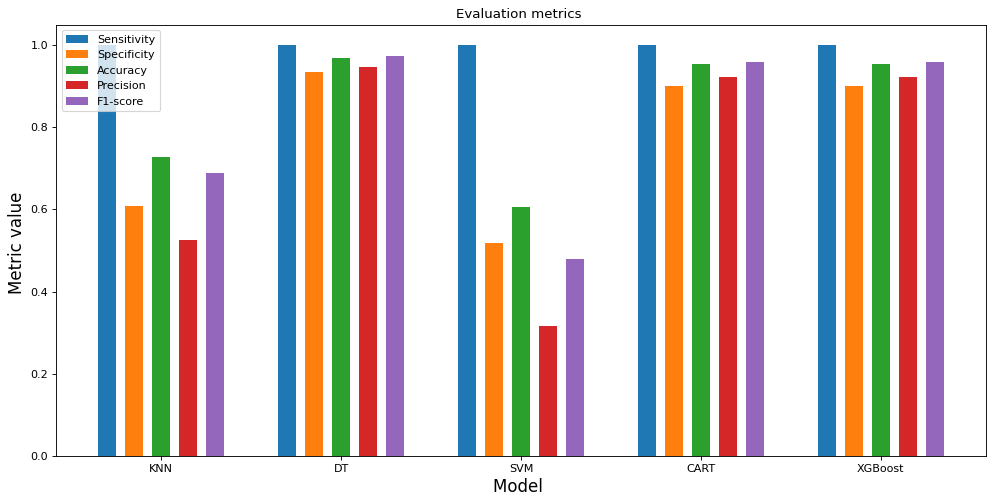

In [ ]:
import numpy
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(15, 7), dpi=80)

X = ['KNN','DT', "SVM", "CART", "XGBoost"]
X_axis = numpy.arange(len(X))

print(l_sensibilitate)
print(l_specificitate)
print(l_acuratete)
print(l_precizie)
print(l_scorulf1)

plt.bar(X_axis - 0.3, l_sensibilitate, 0.1, label = 'Sensitivity')
plt.bar(X_axis - 0.15, l_specificitate, 0.1, label = 'Specificity')
plt.bar(X_axis, l_acuratete, 0.1, label = 'Accuracy')
plt.bar(X_axis + 0.15, l_precizie, 0.1, label = 'Precision')
plt.bar(X_axis + 0.3, l_scorulf1, 0.1, label = 'F1-score')


plt.xticks(X_axis, X)
plt.xlabel("Model ", fontsize=15)
plt.ylabel("Metric value ", fontsize=15)
plt.title("Evaluation metrics ")
plt.legend()
plt.savefig("evalm_ds1.pdf", format="pdf", bbox_inches="tight")
plt.show()
